In [1]:
print("Hello, Jupyter!")

Hello, Jupyter!


In [2]:
# Show figures inline
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import matplotlib as mpl
# Auto reload packages
%load_ext autoreload
%autoreload 2

plt.style.use('./niceplot2jay.mplstyle')

In [3]:
# file = '/appalachia/d6/yujie/tmp/snapshot_600.hdf5'
file = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_659.hdf5'
# file = './snapshot_659_9.hdf5'
# Read the file
f = h5py.File(file, 'r')

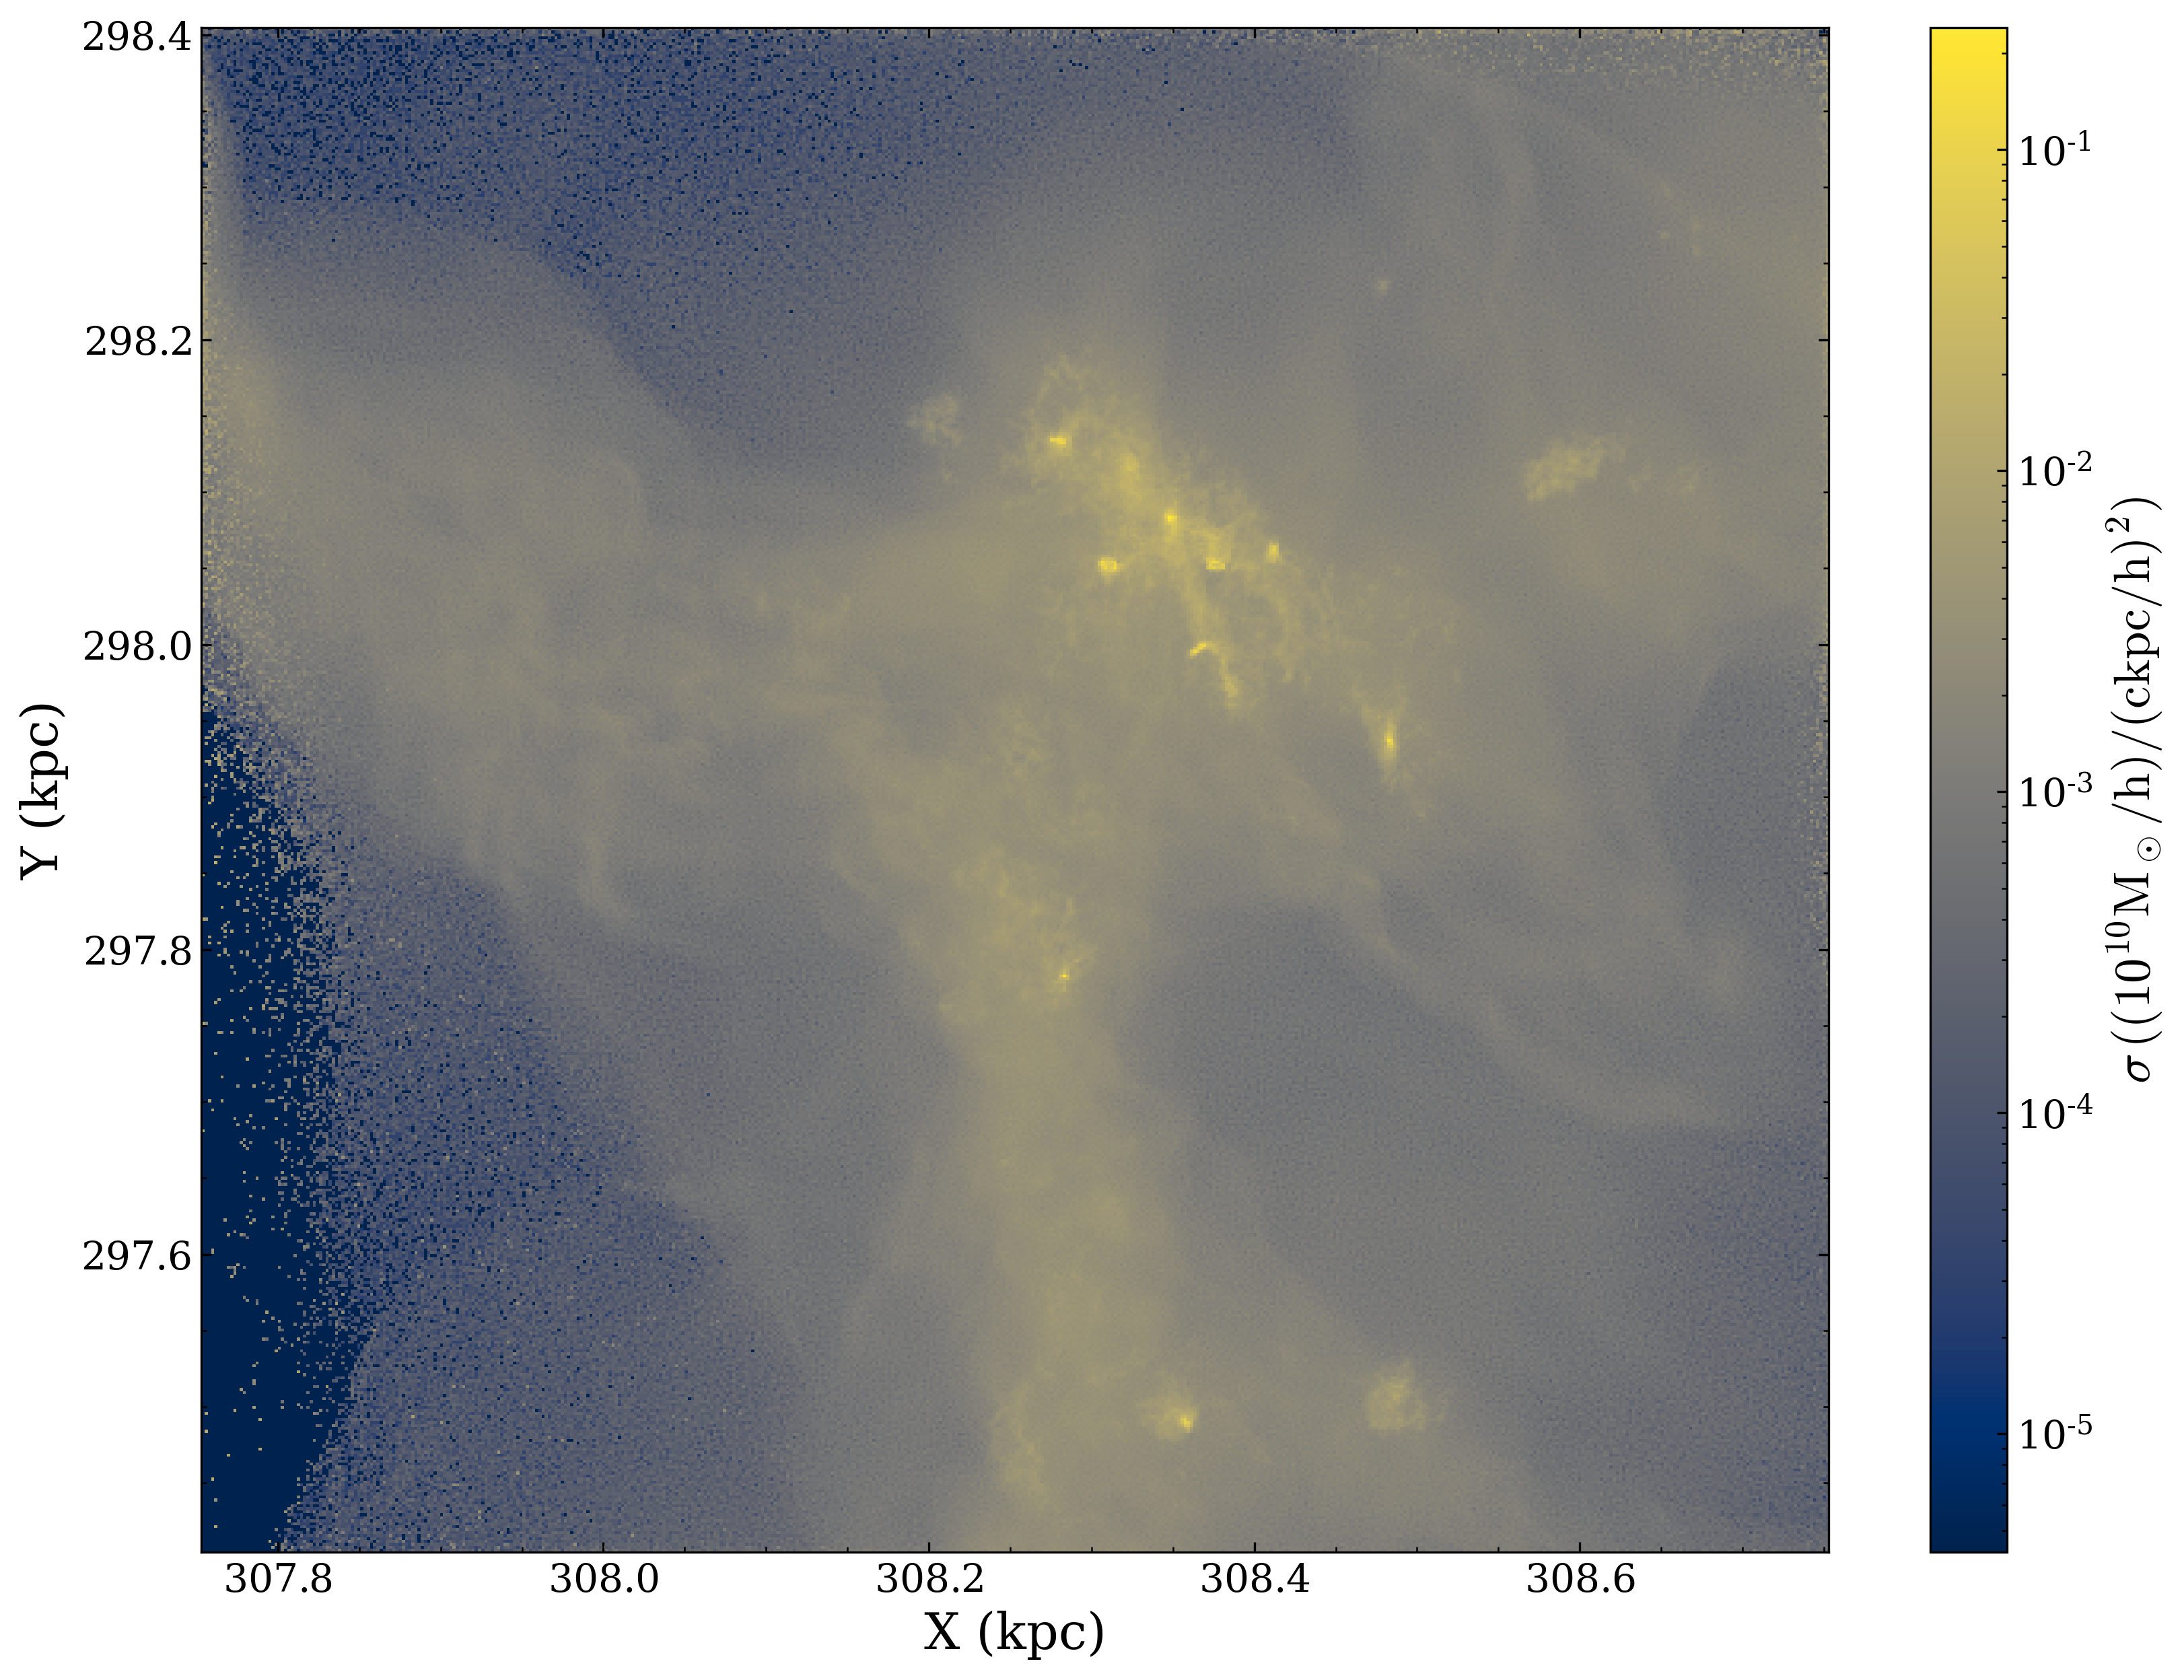

In [70]:
# Density Projection Plot
coords = f['PartType0/Coordinates'][()]
m = f['PartType0/Masses'][()]
bin = 512
bin_area = (1/bin)**2
plt.figure(figsize=(13,10))
hist = plt.hist2d(coords[:,0], coords[:,1], weights=m/bin_area,
    norm=mpl.colors.LogNorm(clip=True), bins=bin, cmap='cividis')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Density Projection Plot')
plt.colorbar(label='$\\Sigma \, \mathrm{((10^{10}M_\odot/h)/(kpc/h)^2)}$')
plt.show()

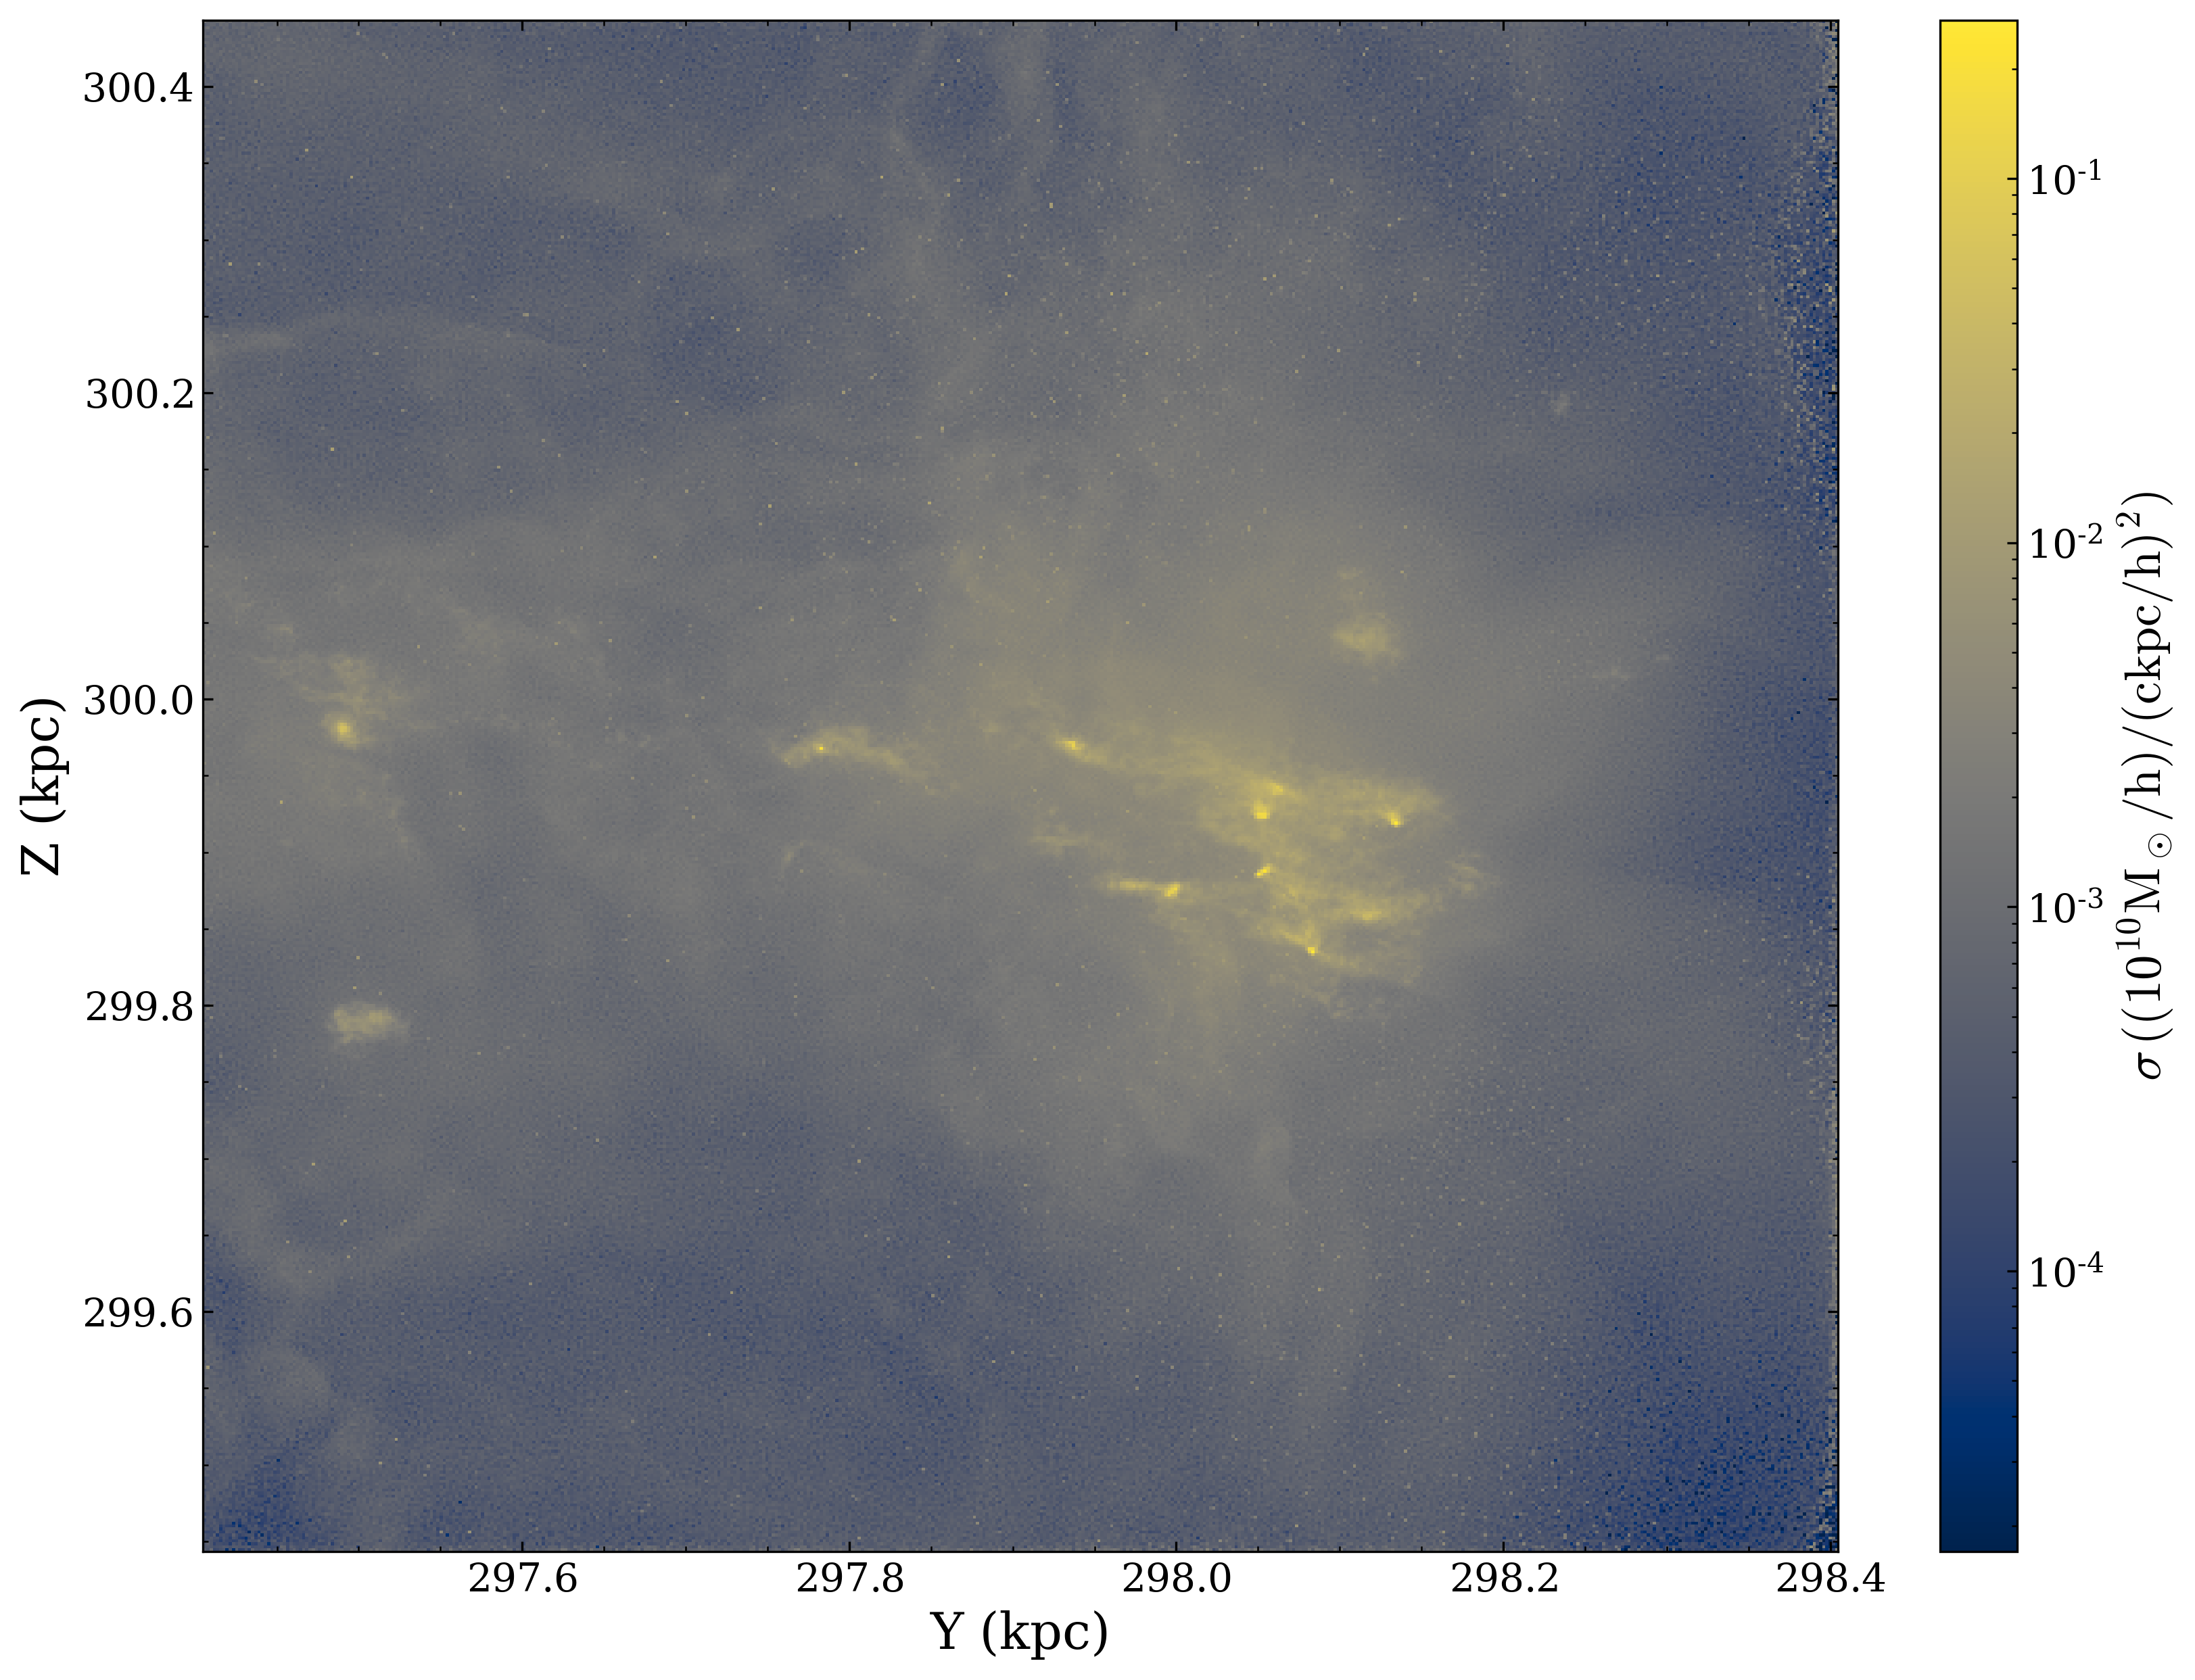

In [113]:
# Density Projection Plot yz
coords = f['PartType0/Coordinates'][()]
m = f['PartType0/Masses'][()]
bin = 512
bin_area = (1/bin)**2
plt.figure(figsize=(13,10))
hist = plt.hist2d(coords[:,1], coords[:,2], weights=m/bin_area,
    norm=mpl.colors.LogNorm(clip=True), bins=bin, cmap='cividis')
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')
# plt.title('Density Projection Plot')
plt.colorbar(label='$\\sigma \, \mathrm{((10^{10}M_\odot/h)/(ckpc/h)^2)}$')
plt.show()

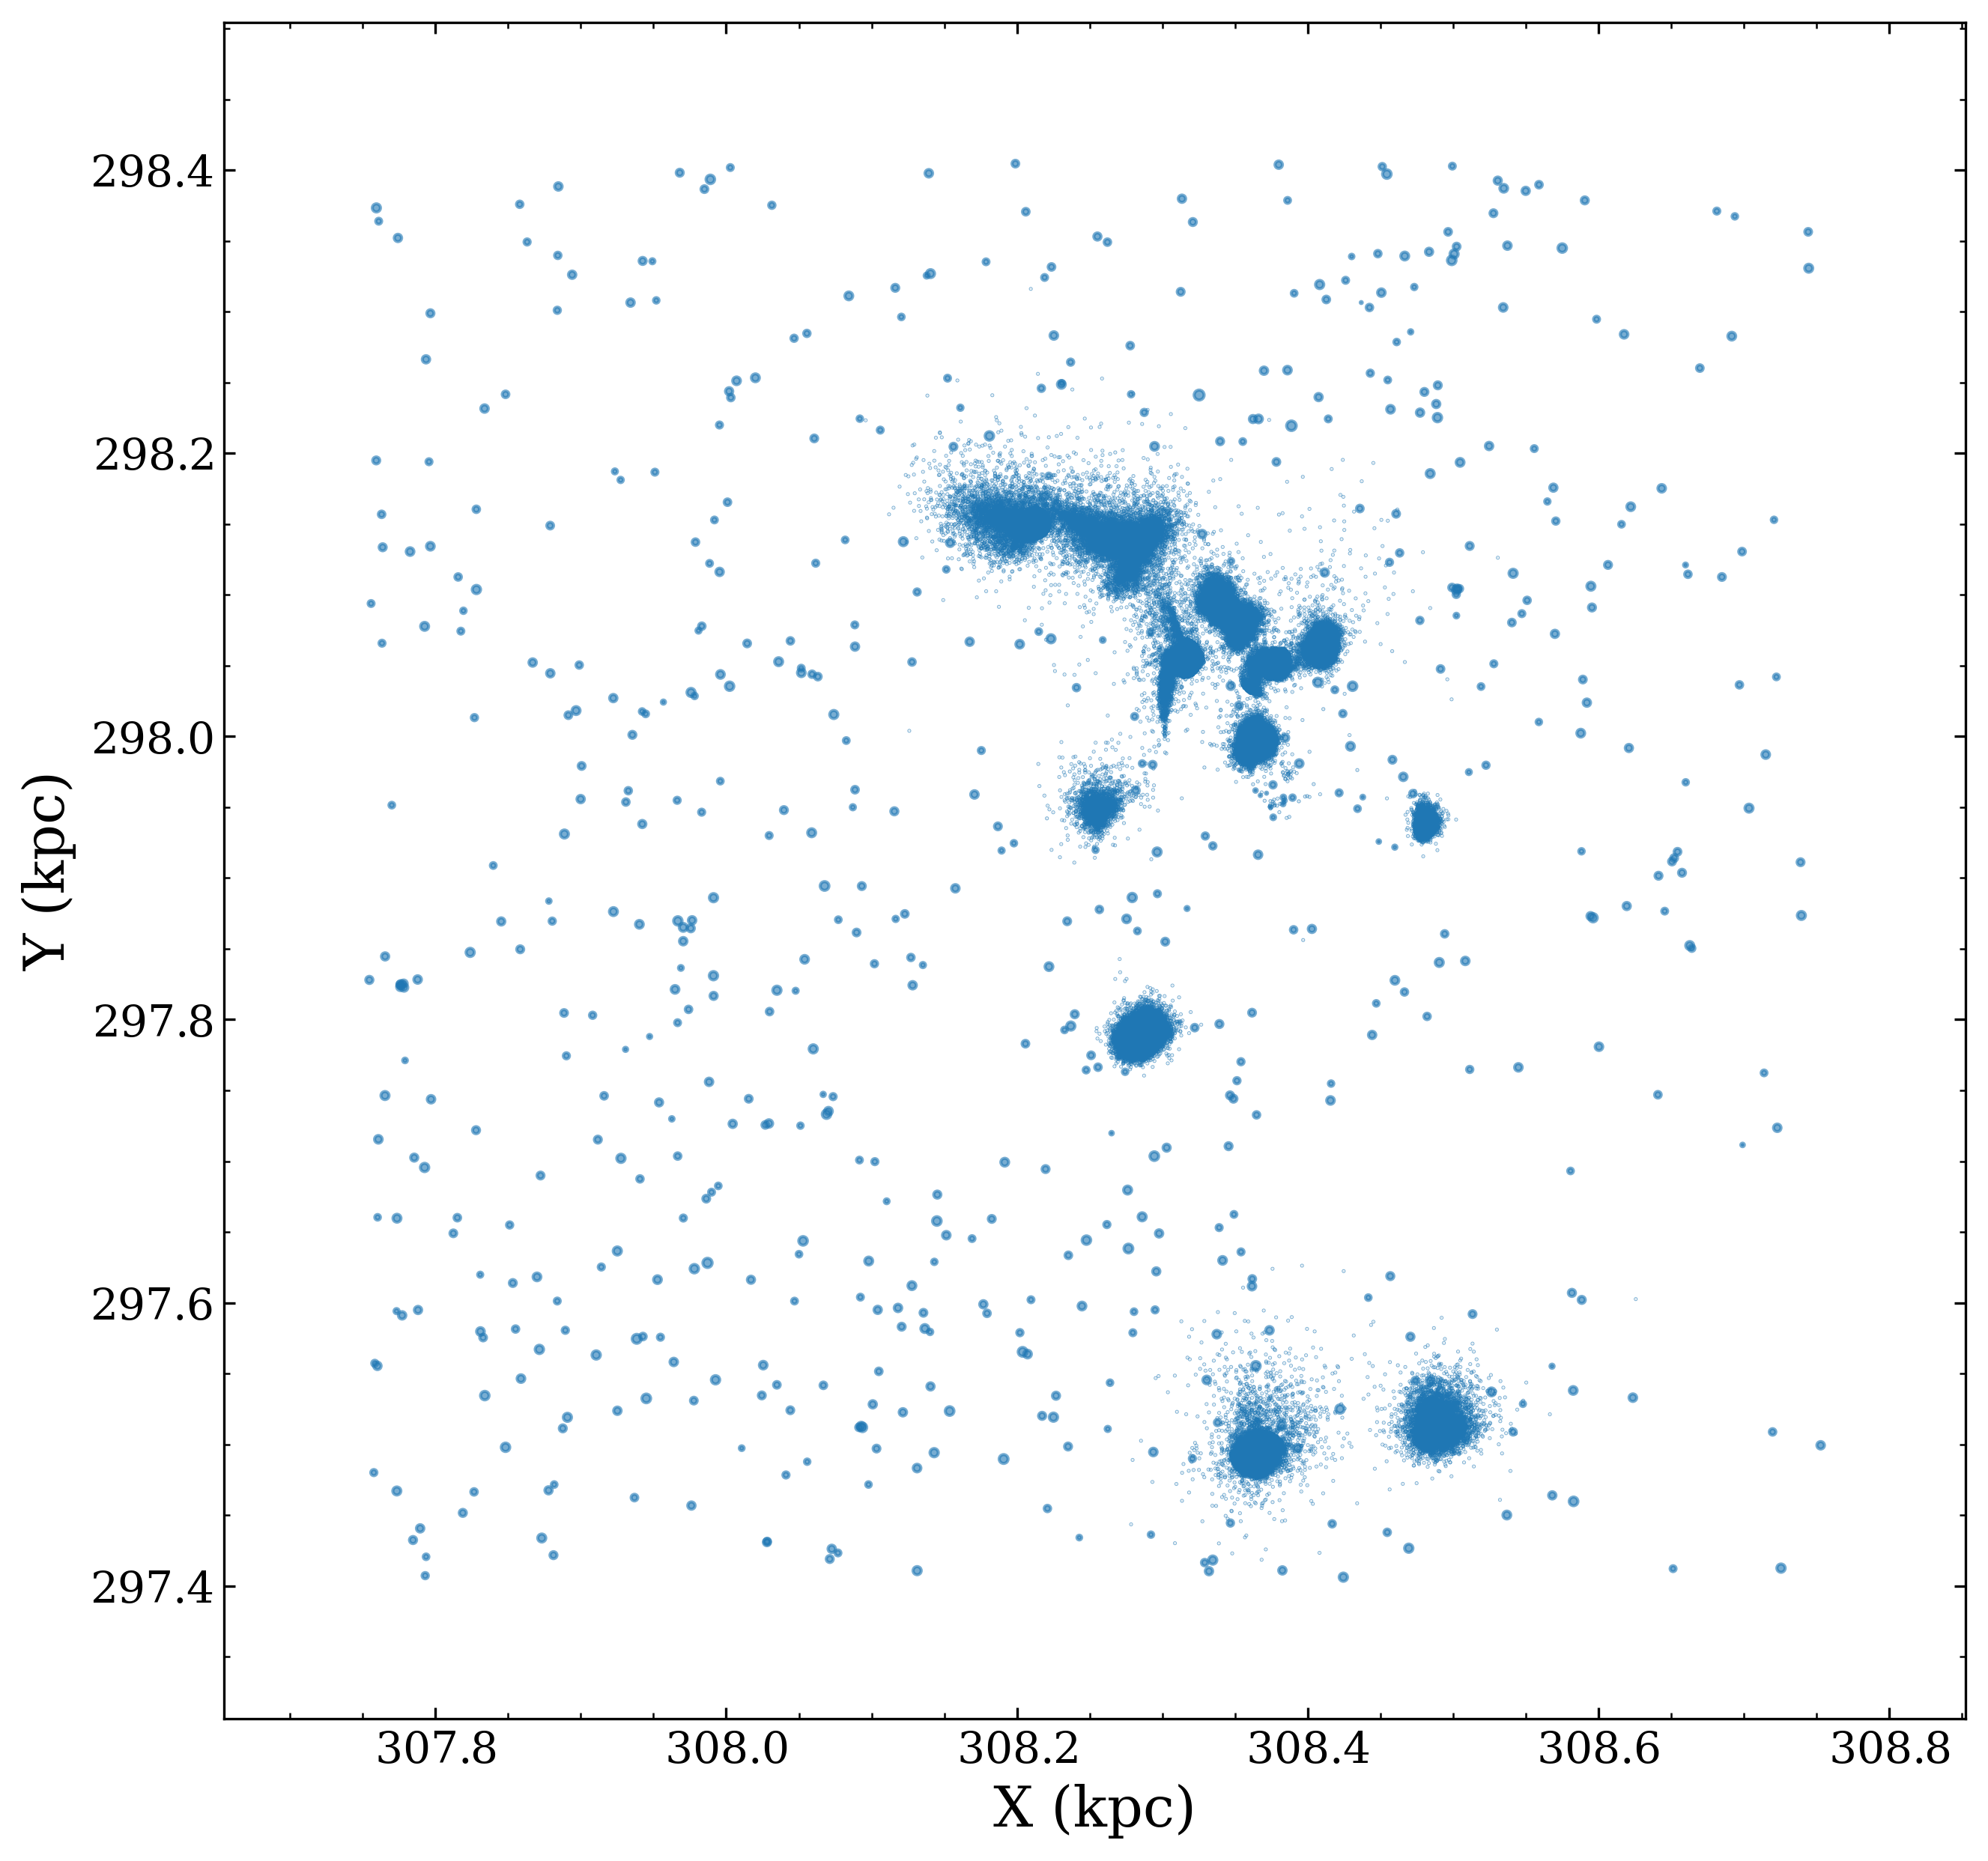

In [72]:
# Stellar Coordinates # Point size scaled to stellar mass
stellar_coords = f['PartType4/Coordinates'][()]
m = f['PartType4/Masses'][()]
m = (m - np.min(m))/(np.max(m) - np.min(m))
m = m * 10 + 0.05


plt.figure(figsize=(10,10))
plt.scatter(stellar_coords[:,0], stellar_coords[:,1], s=m, alpha=0.6)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Stellar Coordinates')
plt.show()

In [13]:
# Density Map (in progress)
coords = f['PartType0/Coordinates'][()]
rho = f['PartType0/Density'][()]
m = f['PartType0/Masses'][()]

In [14]:
# CONFIGURATION
plane = [0,0,1,-300] # z = 300
bins = 512

In [86]:
A, B, C, D = plane
V = m/rho # volume = mass/density
R = ((3*V)/(4*np.pi))**(1/3)
d = np.abs(A*coords[:,0] + B*coords[:,1] + C*coords[:,2] + D) / (A**2 + B**2 + C**2)**0.5
d_extend = np.abs(A*coords[:,0] + B*coords[:,1] + C*coords[:,2] + (D - 1/bins)) / (A**2 + B**2 + C**2)**0.5
weight = 1 - d**2/R**2

In [87]:
# Bin
xmin, xmax = np.min(coords[:,0]), np.max(coords[:,0])
ymin, ymax = np.min(coords[:,1]), np.max(coords[:,1])
zmin, zmax = np.min(coords[:,2]), np.max(coords[:,2])

x0 = np.linspace(xmin, xmax, bins)
y0 = np.linspace(ymin, ymax, bins)
z0 = np.linspace(zmin, zmax, bins)

if (A,B,C)==(0,0,1):
    xgrid, ygrid = np.meshgrid(x0,y0,indexing='ij')
    coords = coords[:,[0,1]]
elif (A,B,C)==(0,1,0):
    xgrid, ygrid = np.meshgrid(z0,x0,indexing='ij')
    coords = coords[:,[2,0]]
elif (A,B,C)==(1,0,0):
    xgrid, ygrid = np.meshgrid(y0,z0,indexing='ij')
    coords = coords[:,[1,2]]

In [88]:
filter = (d<R) | (d_extend<R)
coords_ = coords[filter]
# f_ = f[filter]
d_ = d[filter]
R_ = R[filter]
V_ = V[filter]
rho_ = rho[filter]
weight_ = weight[filter]

In [89]:
np.shape(coords_)

(115864, 2)

In [90]:
count = 0
data = []
for x1, y1 in np.stack((xgrid.flat, ygrid.flat),axis=1):
    # Select all particles contribute to this bin and calculate the weighted
    # average value of some physical quantity f_
    filter = (x1 - coords_[:,0])**2 + (y1 - coords_[:,1])**2 < d_**2
    fsum = np.sum(weight_[filter] * rho_[filter])
    wsum = np.sum(weight_[filter])
    if wsum == 0: # Avoid divided by zero
        wsum = 1
    value = fsum / wsum
    data.append([x1, y1, value])

    if count % 2000 == 0:
        print(count/(bins*bins)*100, '%')
    count += 1

0.0 %
0.762939453125 %
1.52587890625 %
2.288818359375 %
3.0517578125 %
3.814697265625 %
4.57763671875 %
5.340576171875 %
6.103515625 %
6.866455078125 %
7.62939453125 %
8.392333984375 %
9.1552734375 %
9.918212890625 %
10.68115234375 %
11.444091796875 %
12.20703125 %
12.969970703125 %
13.73291015625 %
14.495849609375 %
15.2587890625 %
16.021728515625 %
16.78466796875 %
17.547607421875 %
18.310546875 %
19.073486328125 %
19.83642578125 %
20.599365234375 %
21.3623046875 %
22.125244140625 %
22.88818359375 %
23.651123046875 %
24.4140625 %
25.177001953125 %
25.93994140625 %
26.702880859375 %
27.4658203125 %
28.228759765625 %
28.99169921875 %
29.754638671875 %
30.517578125 %
31.280517578125 %
32.04345703125 %
32.806396484375 %
33.5693359375 %
34.332275390625 %
35.09521484375 %
35.858154296875 %
36.62109375 %
37.384033203125 %
38.14697265625 %
38.909912109375 %
39.6728515625 %
40.435791015625 %
41.19873046875 %
41.961669921875 %
42.724609375 %
43.487548828125 %
44.25048828125 %
45.013427734375 %

In [91]:
data = np.array(data)

In [20]:
# Try numba： 1m30s -> 1m
from utils_data import VolumeSlice
data = VolumeSlice(coords, rho, m, rho, plane, bins)

0 %
1 %
3 %
5 %
7 %
9 %
11 %
13 %
15 %
17 %
19 %
20 %
22 %
24 %
26 %
28 %
30 %
32 %
34 %
36 %
38 %
40 %
41 %
43 %
45 %
47 %
49 %
51 %
53 %
55 %
57 %
59 %
61 %
62 %
64 %
66 %
68 %
70 %
72 %
74 %
76 %
78 %
80 %
82 %
83 %
85 %
87 %
89 %
91 %
93 %
95 %
97 %
99 %


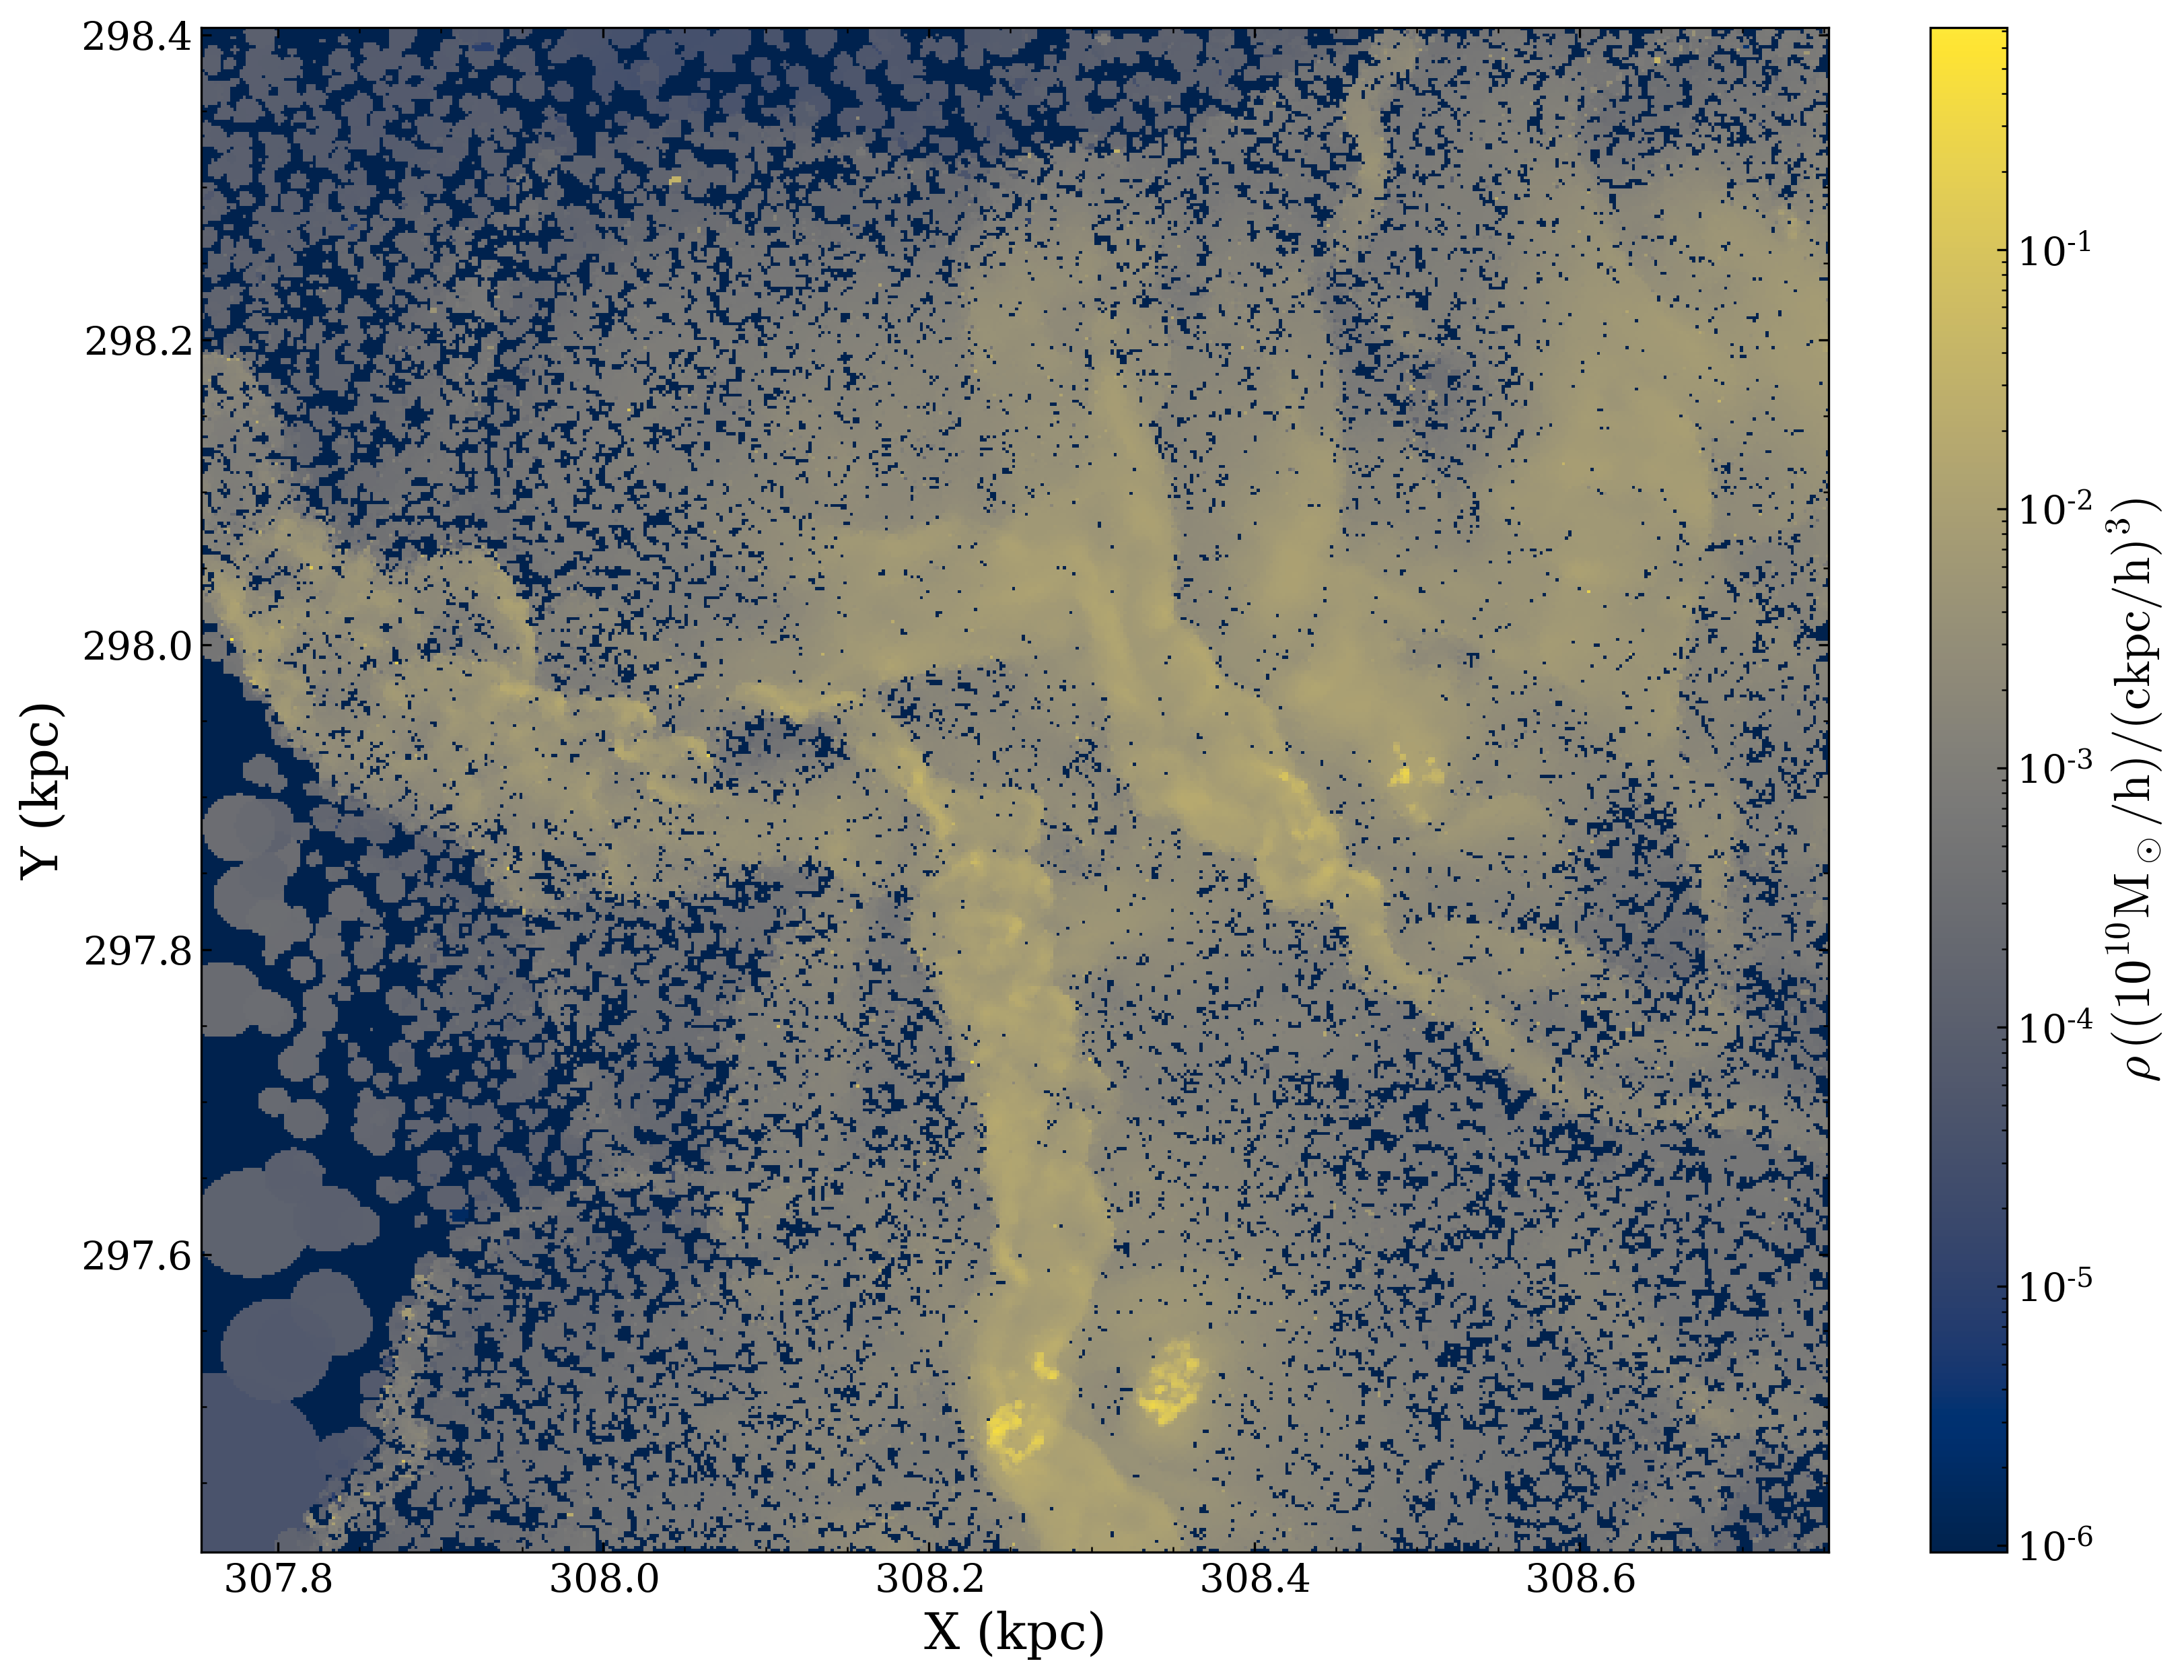

In [17]:
plt.figure(figsize=(13,10))
hist = plt.hist2d(data[:,0], data[:,1], weights=data[:,2], 
    norm=mpl.colors.LogNorm(clip=True), bins=bins, cmap='cividis')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Density Map')
plt.colorbar(label='$\\rho \, \mathrm{((10^{10}M_\odot/h)/(ckpc/h)^3)}$')
plt.show()

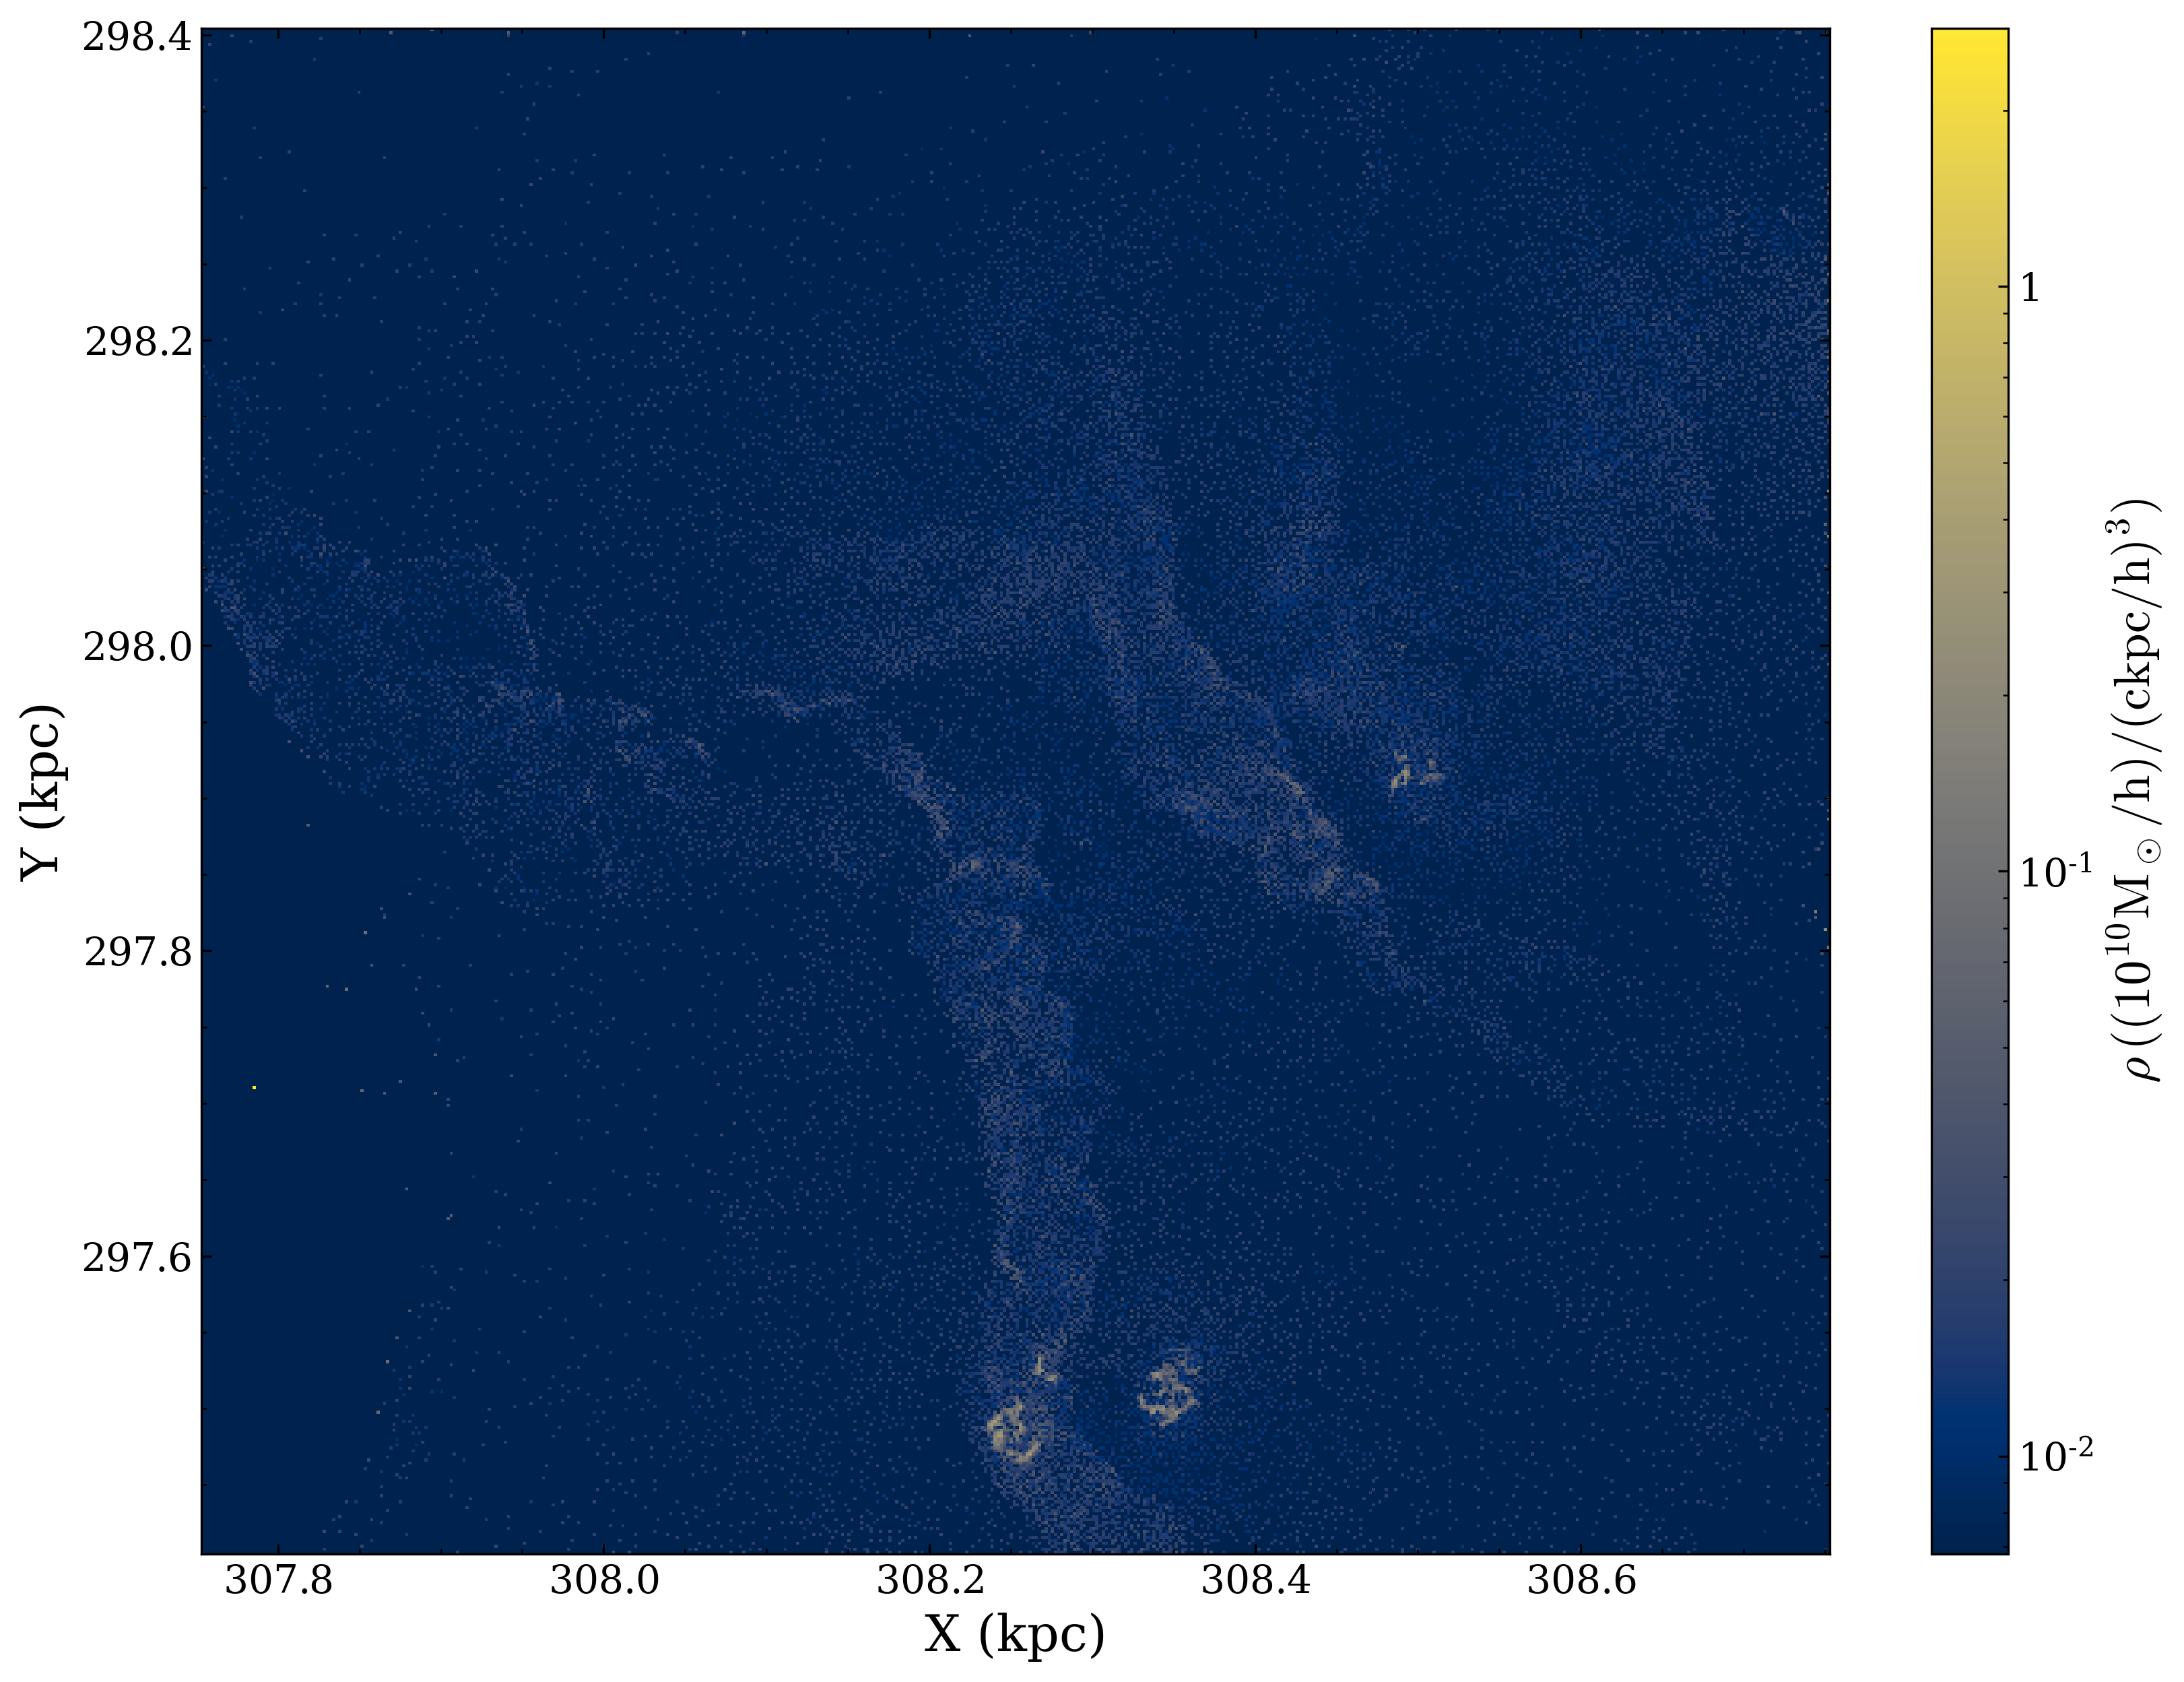

In [119]:
# Density Map # Simple slice
coords = f['PartType0/Coordinates'][()]
rho = f['PartType0/Density'][()]
m = f['PartType0/Masses'][()]
bin = 512
bin_area = (1/bin)**2
column_length = 1/bin

filter = (coords[:,2]>300) & (coords[:,2]<(300 + column_length))
coords = coords[filter]
rho = rho[filter]
m = m[filter]

plt.figure(figsize=(13,10))
hist = plt.hist2d(coords[:,0], coords[:,1], weights=m/(bin_area*column_length), 
    norm=mpl.colors.LogNorm(clip=True), bins=512, cmap='cividis')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Density Map')
plt.colorbar(label='$\\rho \, \mathrm{((10^{10}M_\odot/h)/(ckpc/h)^3)}$')
plt.show()

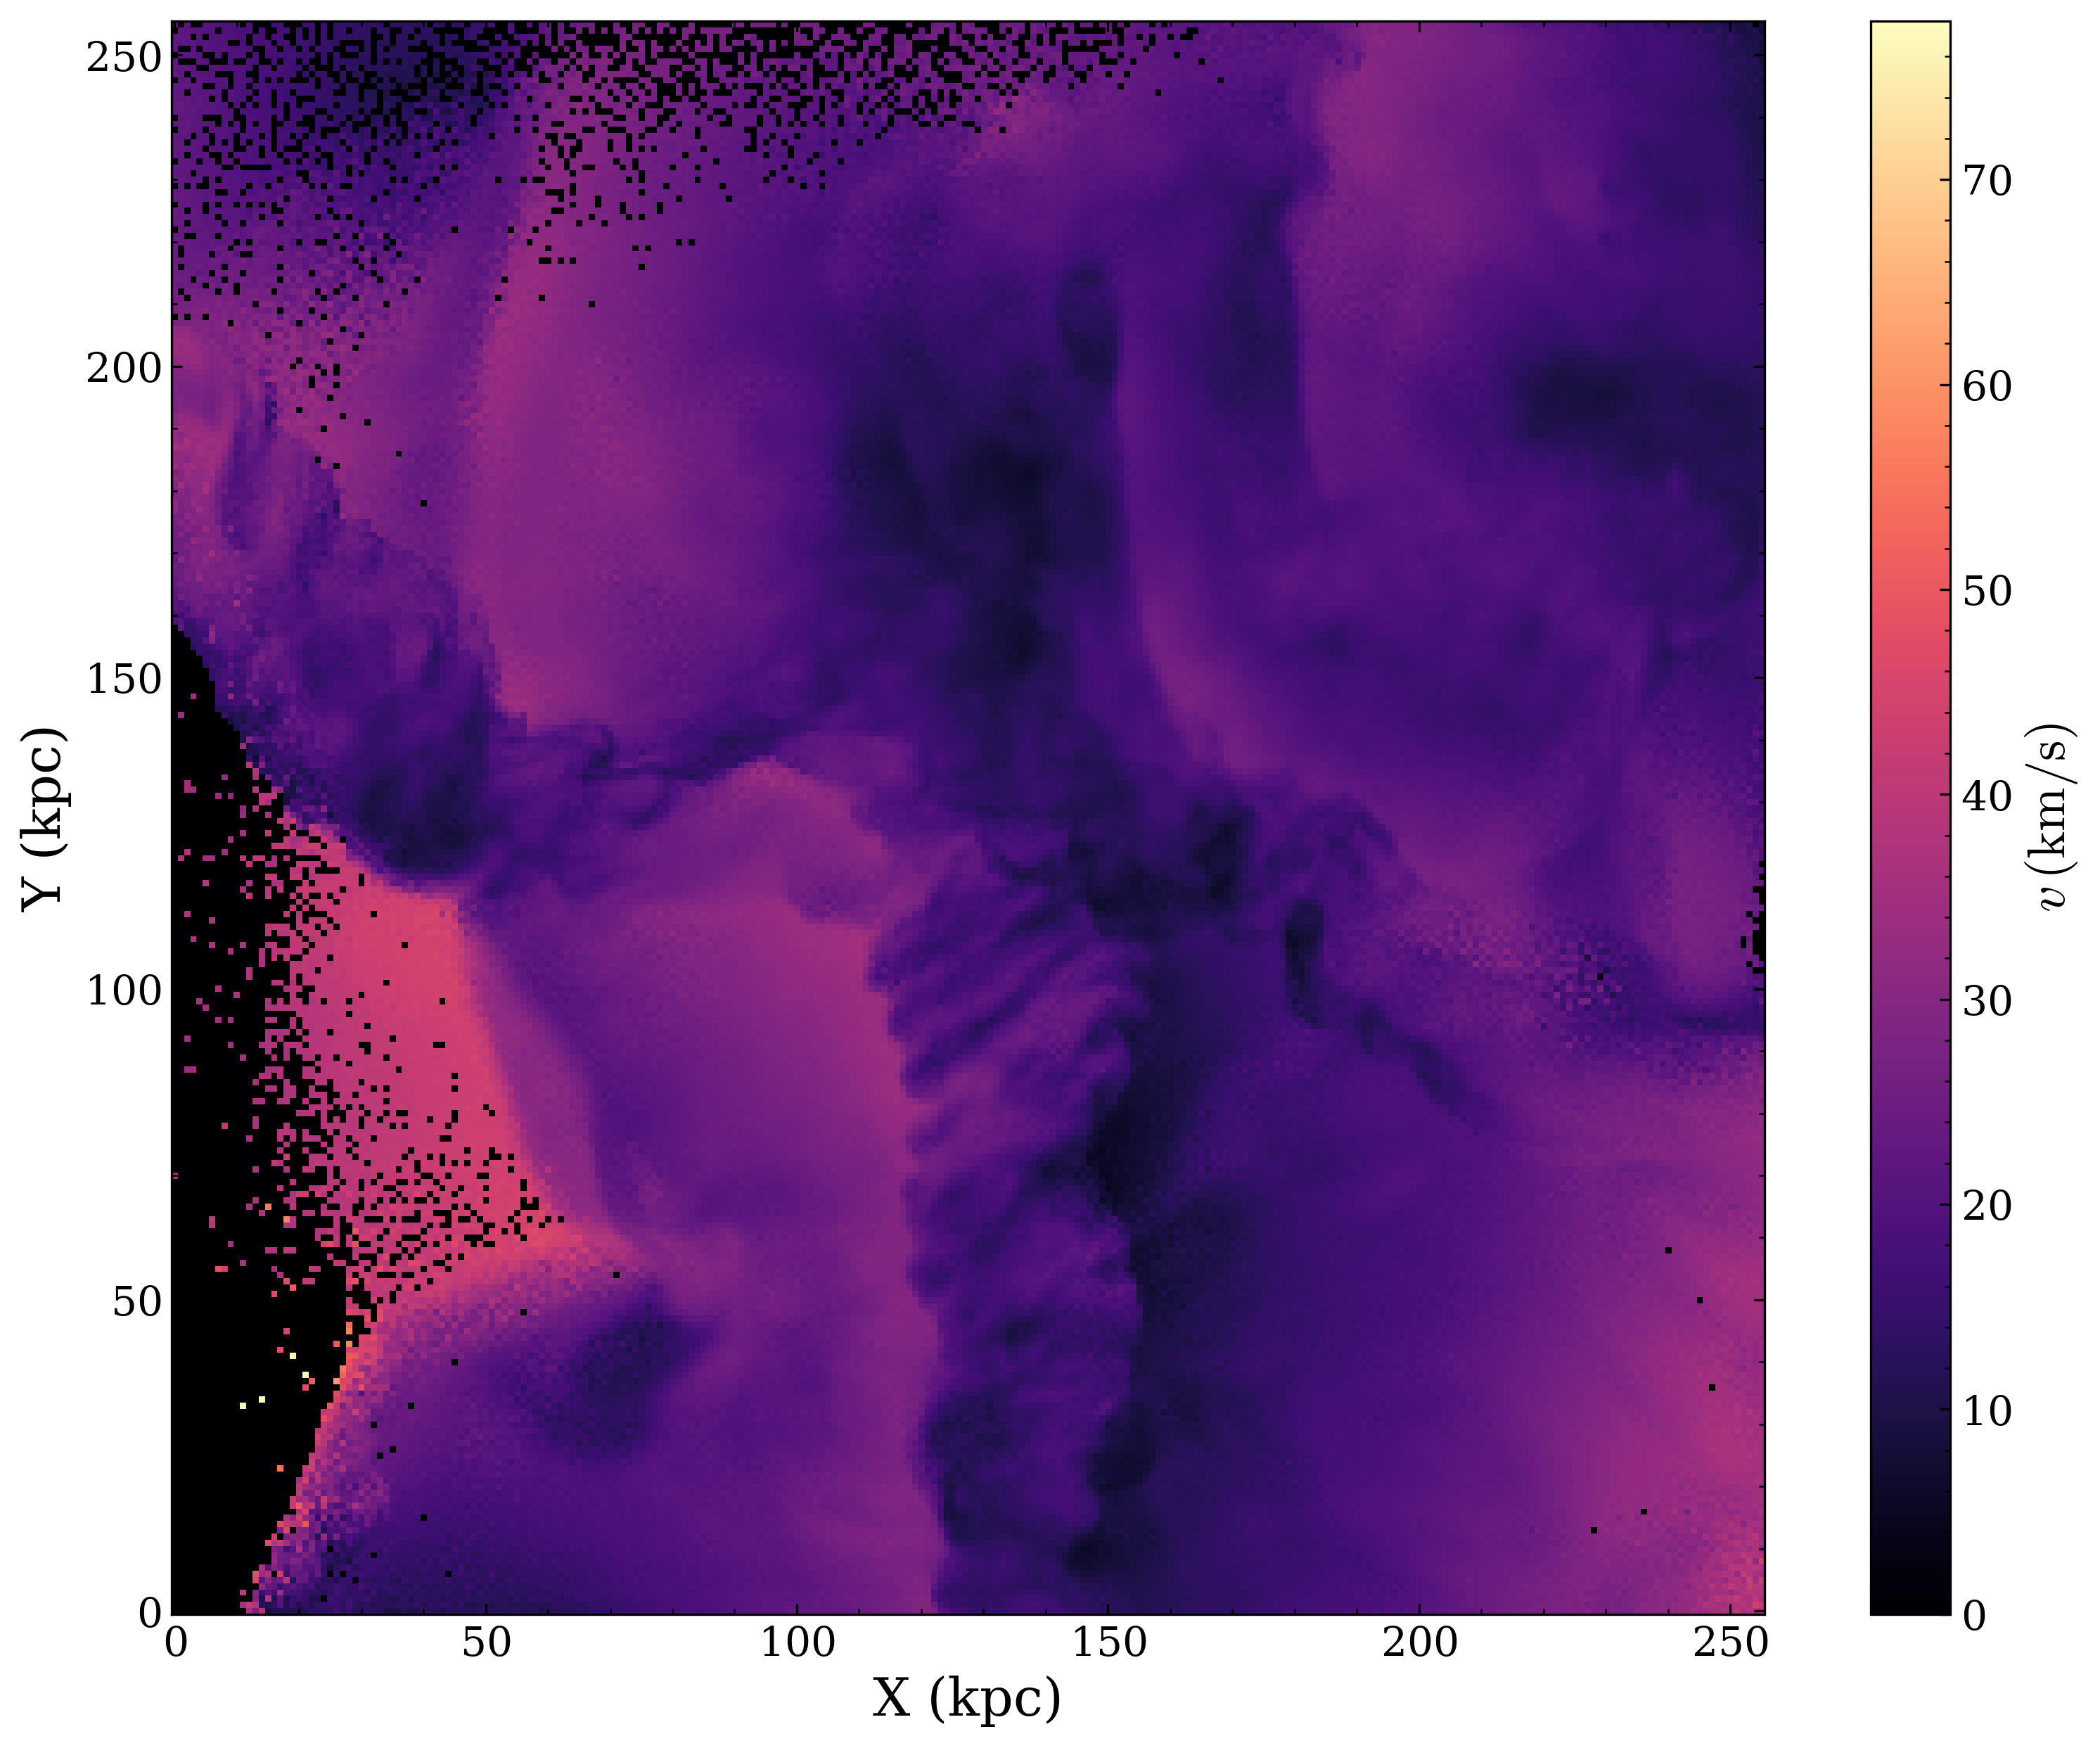

In [114]:
# Turbulence Speed Map # Simple slice # Mass mean
coords = f['PartType0/Coordinates'][()]
v = f['PartType0/Velocities'][()]
m = f['PartType0/Masses'][()]
# Calculate turbulence speed
# Calculate center of mass velocity
sum_mvx, sum_mvy, sum_mvz = np.sum(m*v[:,0]), np.sum(m*v[:,1]), np.sum(m*v[:,2])
sum_m = np.sum(m)
vx_com, vy_com, vz_com = sum_mvx/sum_m, sum_mvy/sum_m, sum_mvz/sum_m
v_com = np.array([vx_com, vy_com, vz_com])
# Turbulence velocity = velocity - center of mass velocity
v_turb = v - v_com
speed_turb = (v_turb[:,0]**2 + v_turb[:,1]**2 + v_turb[:,2]**2)**0.5

# SimpleSlice
filter = (coords[:,2]>300) & (coords[:,2]<300.1)
speed_turb = speed_turb[filter]
m = m[filter]
coords = coords[filter]

# Mean by mass
# Calculate the COM velocity of each column as the velocity of the column
hist_m, xedges, yedges = np.histogram2d(coords[:,0], coords[:,1], weights=m, bins=256)
hist_m_speed, xedges, yedges = np.histogram2d(coords[:,0], coords[:,1], weights=m*speed_turb, bins=256)
hist_m[hist_m==0] = 1 # Prevent divided by zero
h = hist_m_speed/hist_m
# Visualize
xmin, xmax = np.min(xedges), np.max(xedges)
ymin, ymax = np.min(yedges), np.max(yedges)

plt.figure(figsize=(13,10))
plt.imshow(np.transpose(h), cmap='magma', origin='lower', extent=(xmin, xmax, ymin, ymax))
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Turbulence Speed Map')
plt.colorbar(label='$v \, \mathrm{(km/s)}$')
plt.show()

/tmp/ipykernel_15593/1210633305.py:25: RuntimeWarning: divide by zero encountered in log10
  logh = np.log10(h)


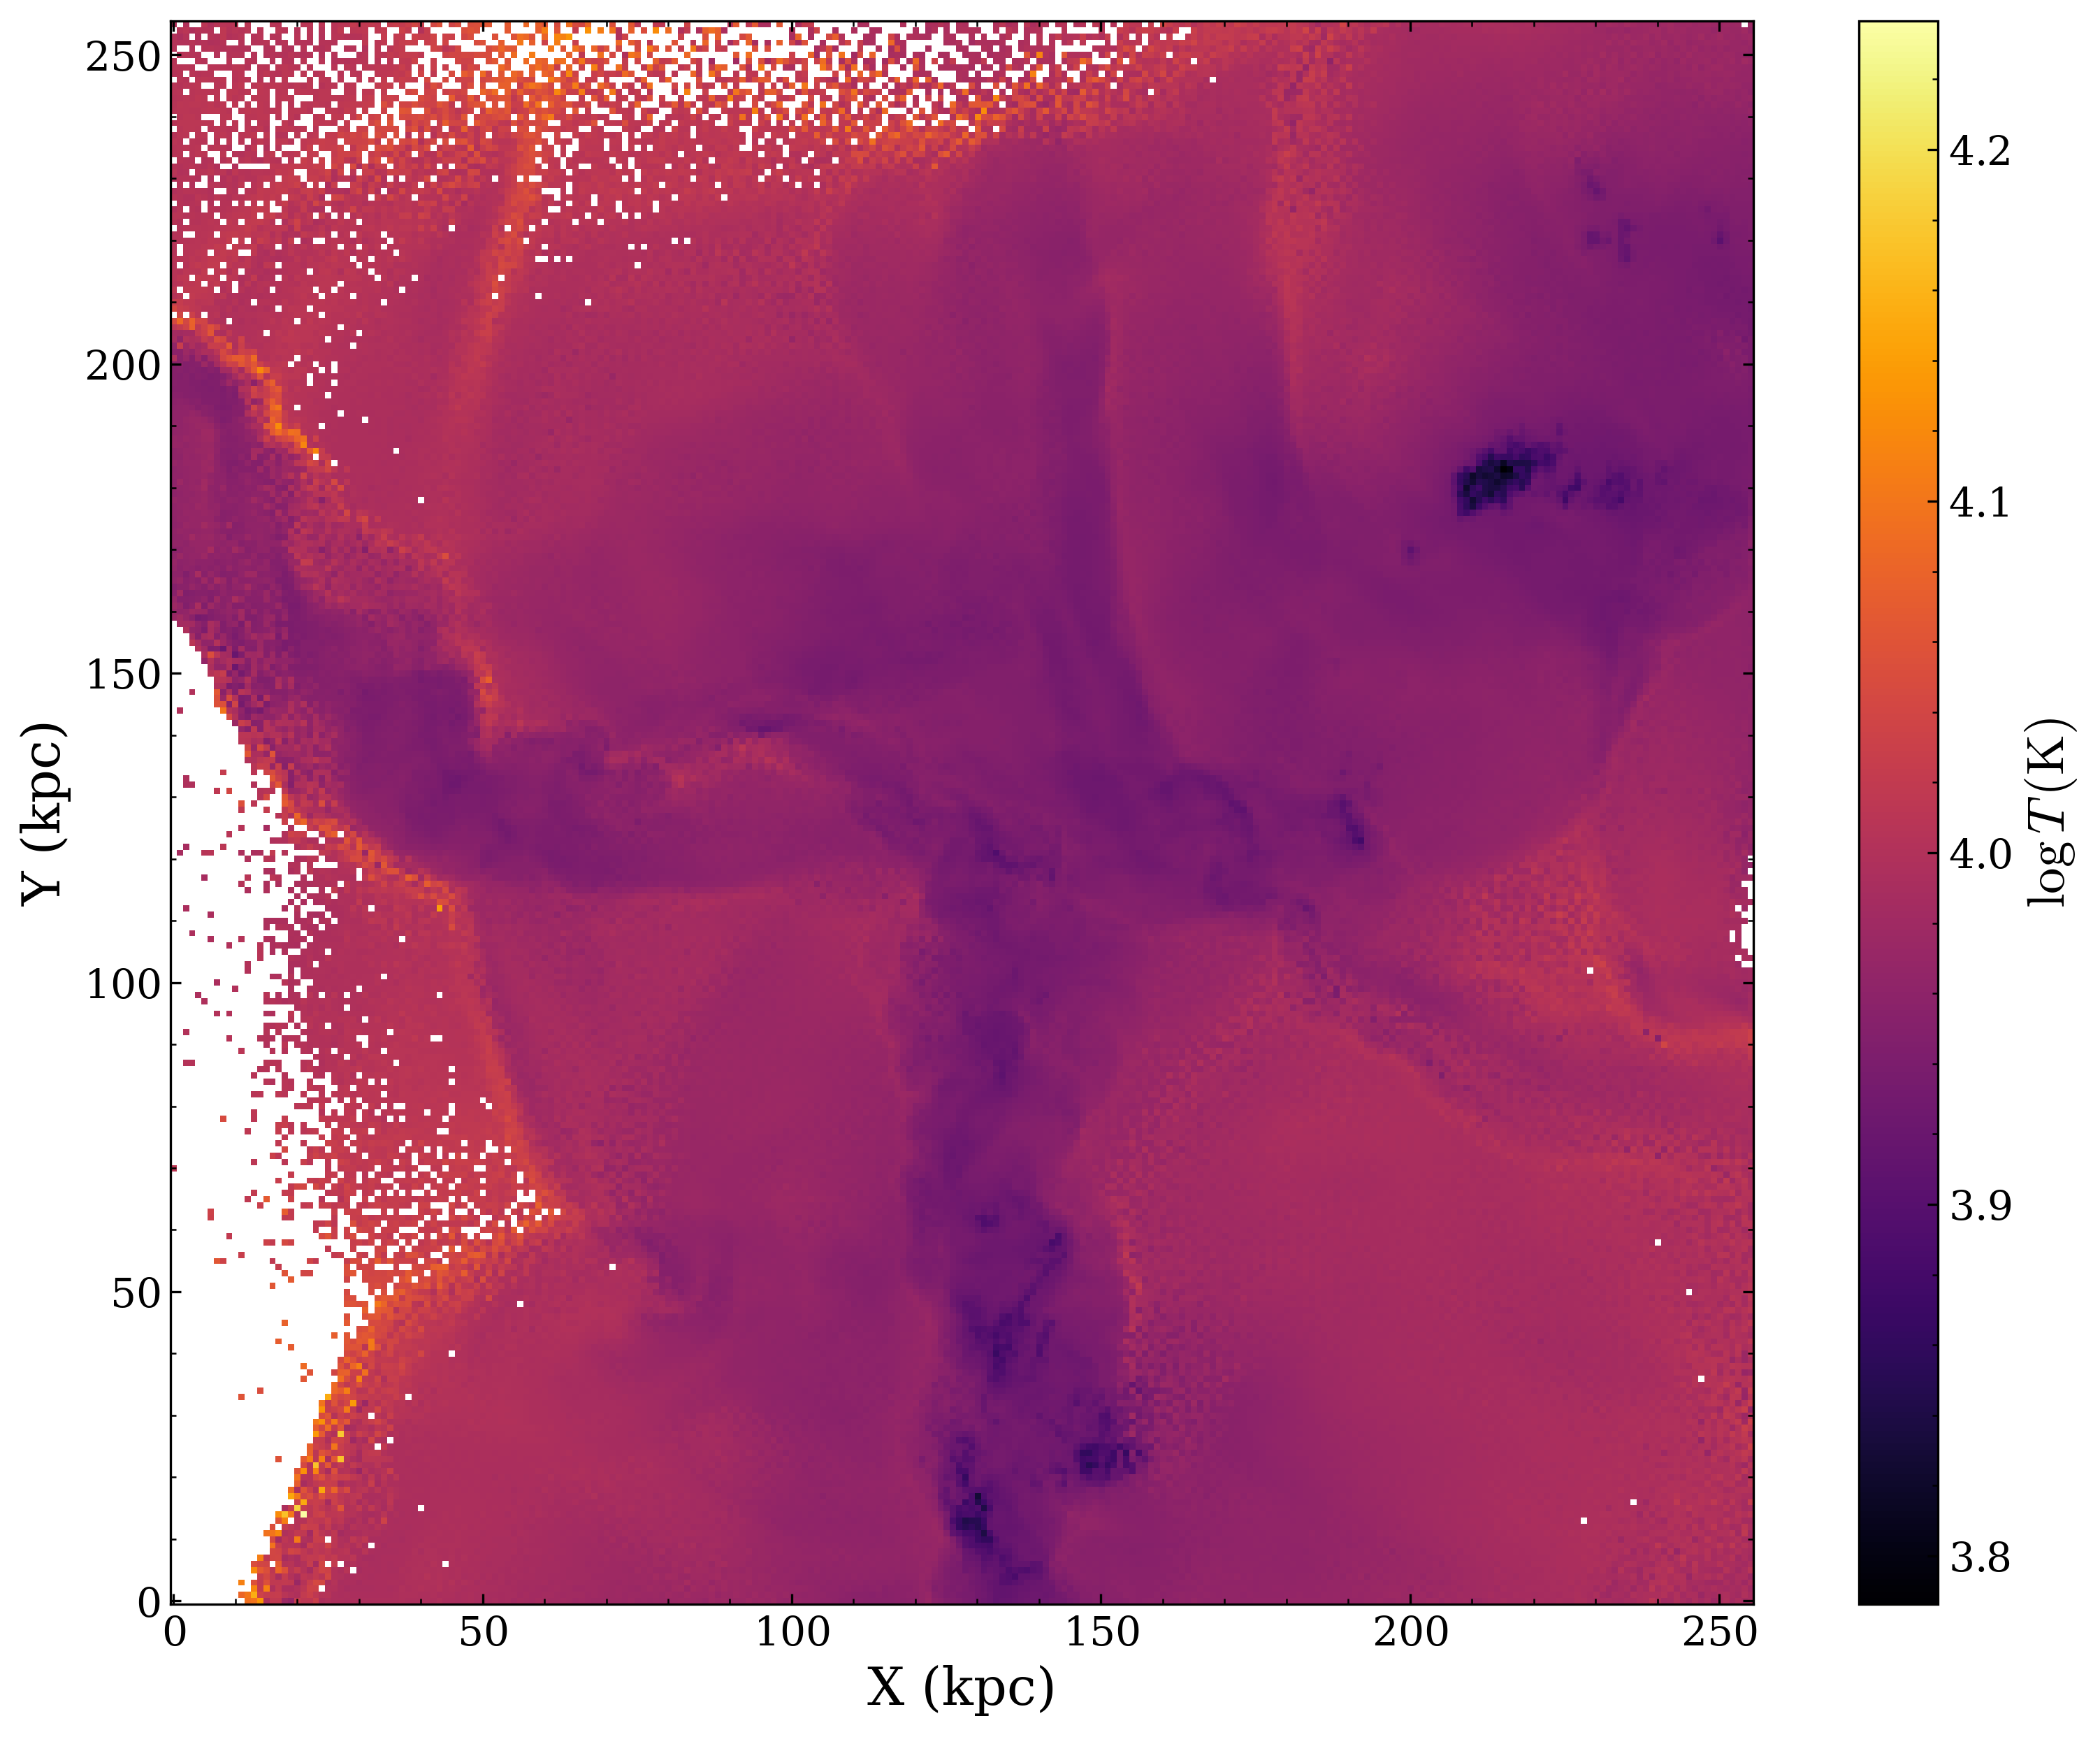

In [101]:
# Temperature Distribution # Simple slice # Volumn mean
coords = f['PartType0/Coordinates'][()]
m = f['PartType0/Masses'][()]
rho = f['PartType0/Density'][()]
# SimpleSlice
filter = (coords[:,2]>300) & (coords[:,2]<300.1)
coords_ = coords[filter]
V_ = m[filter]/rho[filter]
# Temperature
u = f['PartType0/InternalEnergy'][()]
xe = f['PartType0/ElectronAbundance'][()]
XH = 0.76
mp = 1.67e-24
gamma = 5/3
kb = 1.38e-16
mu = 4/(1 + 3*XH + 4*XH*xe) * mp
T = (gamma - 1)*u/kb * 10**10 * mu
# Slice
T_ = T[filter]
# Calculate histogram
hist_V, xedges, yedges = np.histogram2d(coords_[:,0], coords_[:,1], weights=V_, bins=256)
hist_V_T, xedges, yedges = np.histogram2d(coords_[:,0], coords_[:,1], weights=T_*V_, bins=256)
hist_V[hist_V == 0] = 1
h = hist_V_T/hist_V
logh = np.log10(h)

plt.figure(figsize=(13,10))
hist = plt.imshow(np.transpose(logh), cmap='inferno')
plt.gca().invert_yaxis()
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
# plt.title('Temperature Map')
plt.colorbar(label='$\log{T} \, \mathrm{(K)}$')
plt.show()

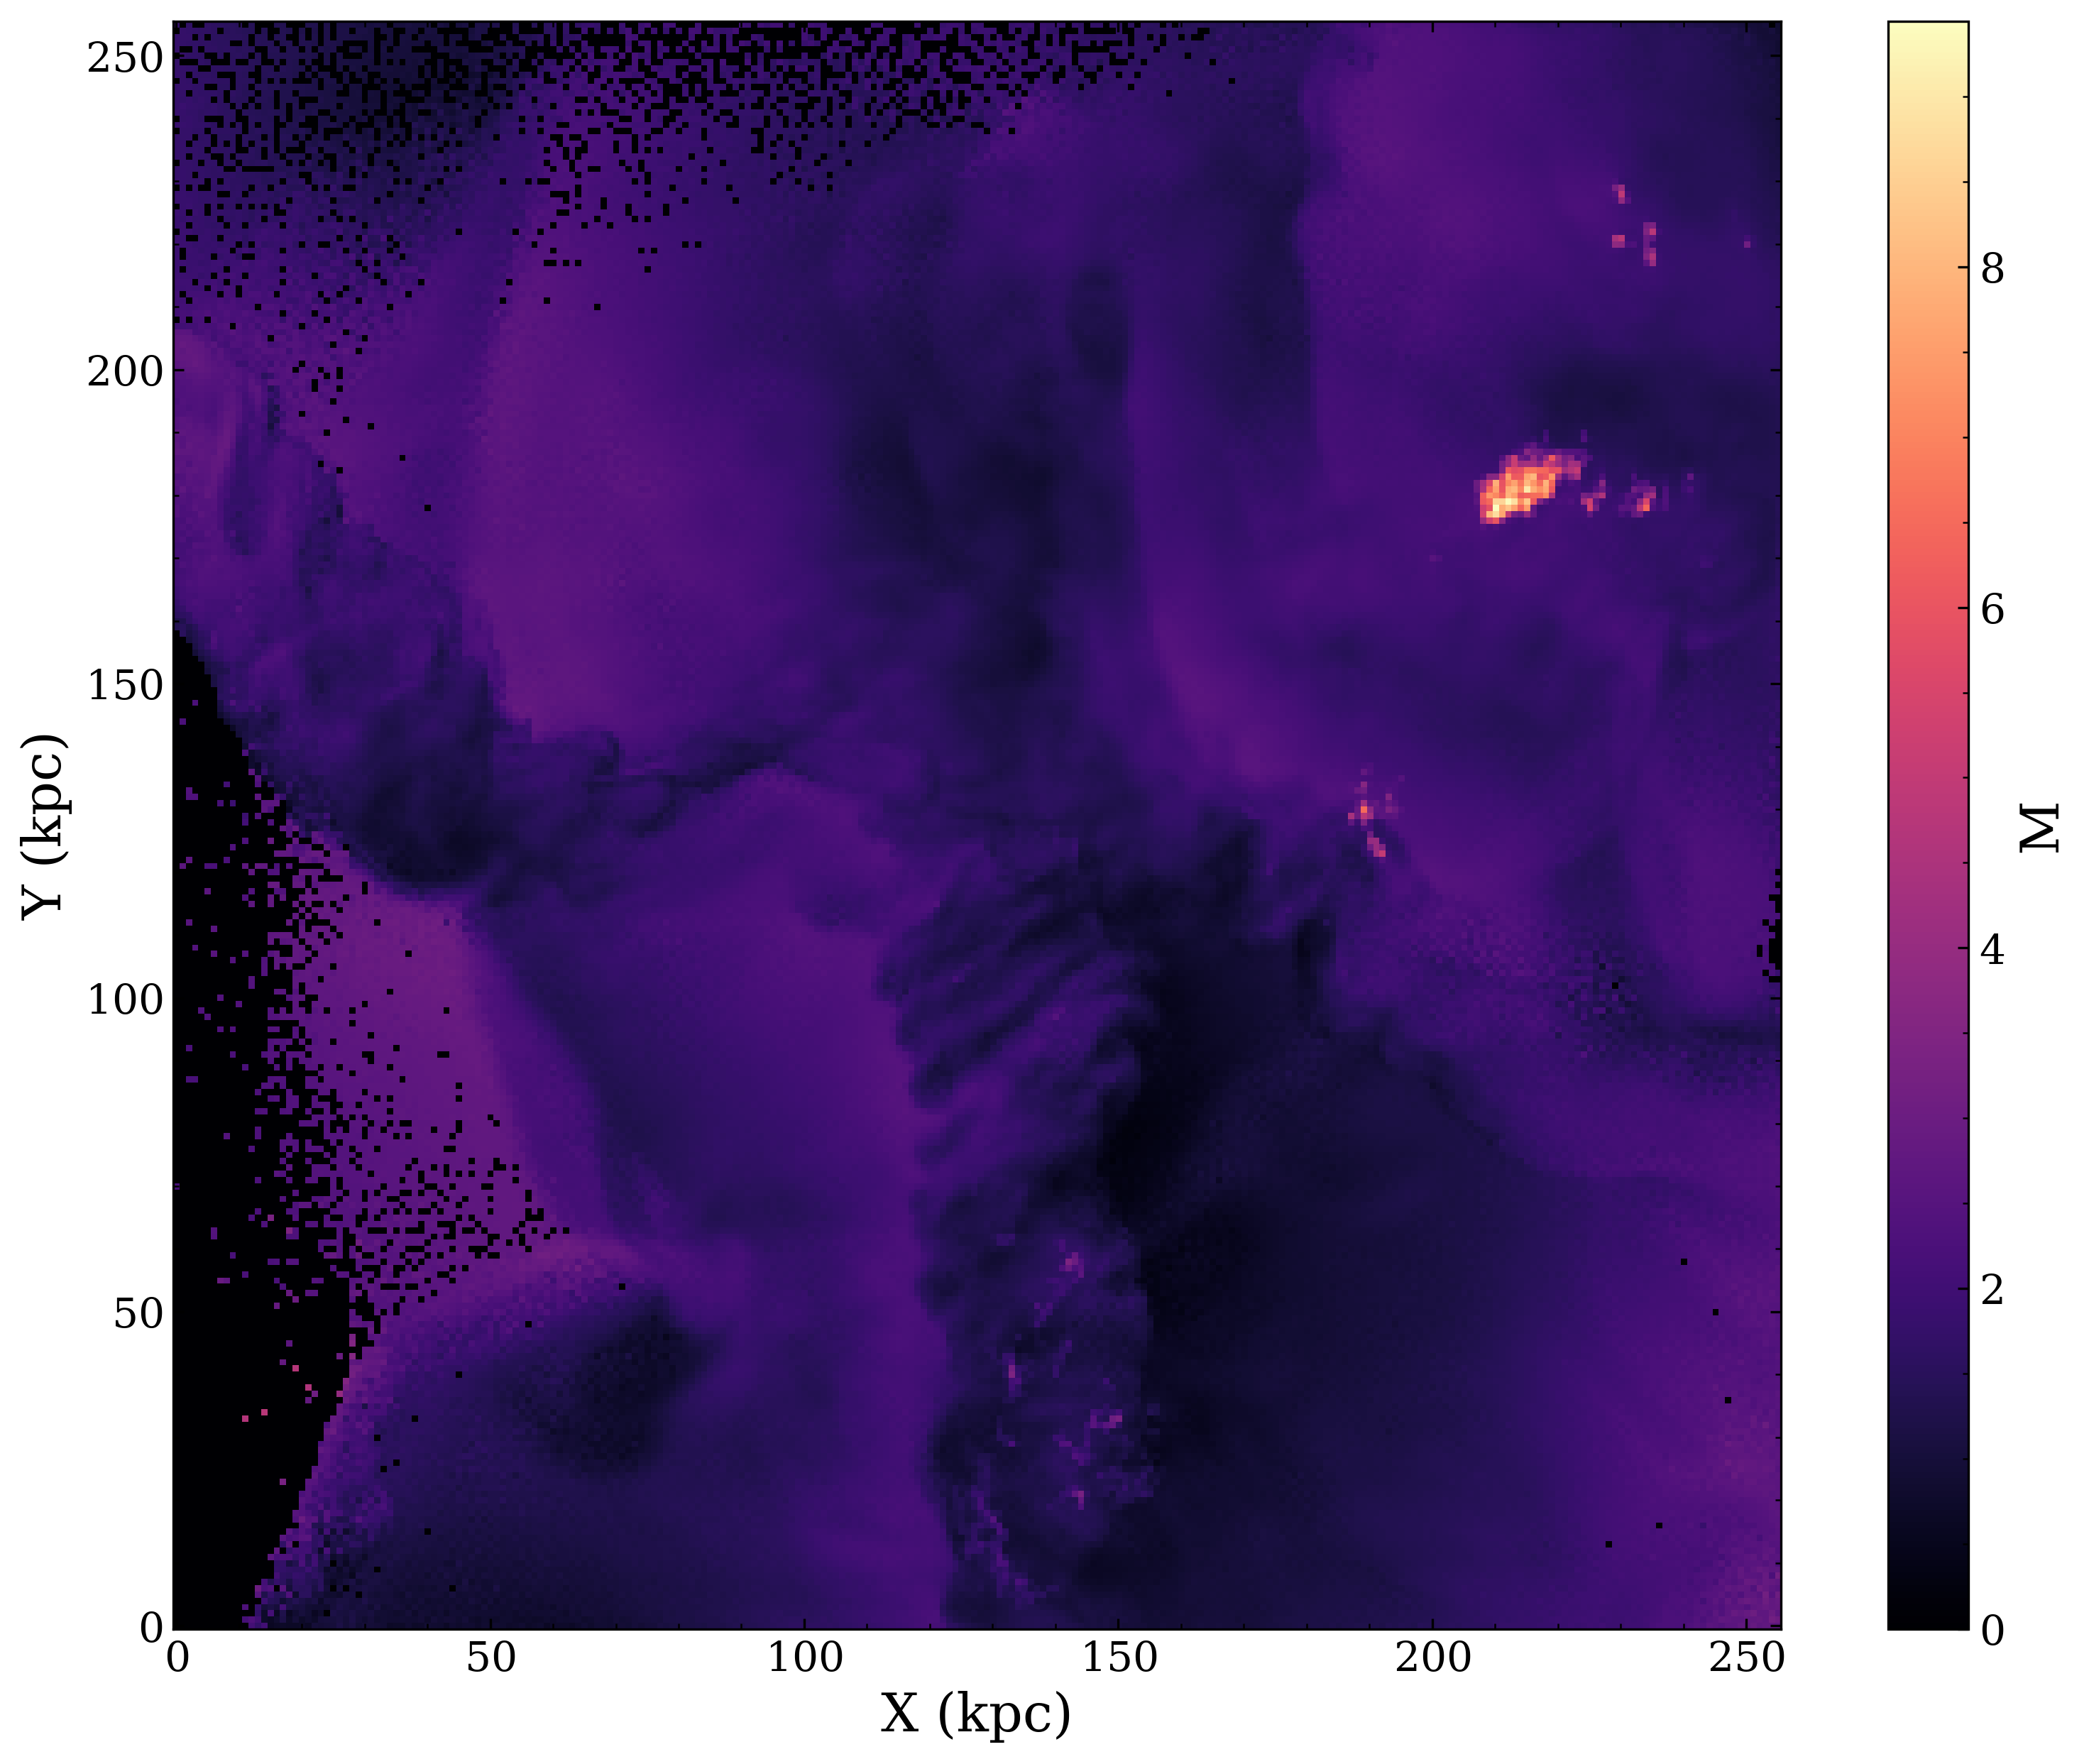

In [98]:
# Machnumber Map # Simple slice # Mass mean
coords = f['PartType0/Coordinates'][()]
v = f['PartType0/Velocities'][()]
rho = f['PartType0/Density'][()]
m = f['PartType0/Masses'][()]
# SimpleSlice
filter = (coords[:,2]>300) & (coords[:,2]<300.1)
# Calculate turbulence speed
# Calculate center of mass velocity
sum_mvx, sum_mvy, sum_mvz = np.sum(m*v[:,0]), np.sum(m*v[:,1]), np.sum(m*v[:,2])
sum_m = np.sum(m)
vx_com, vy_com, vz_com = sum_mvx/sum_m, sum_mvy/sum_m, sum_mvz/sum_m
v_com = np.array([vx_com, vy_com, vz_com])
# Turbulence velocity = velocity - center of mass velocity
v_turb = v - v_com
speed_turb = (v_turb[:,0]**2 + v_turb[:,1]**2 + v_turb[:,2]**2)**0.5

# Calculate temperature
u = f['PartType0/InternalEnergy'][()]
xe = f['PartType0/ElectronAbundance'][()]
XH = 0.76
mp = 1.67e-24
gamma = 5/3
kb = 1.38e-16
mu = 4/(1 + 3*XH + 4*XH*xe) * mp
T = (gamma - 1)*u/kb * 10**10 * mu
# Calculate soundspeed
soundspeed = ((gamma * kb * T)/(mu))**0.5 / 10**5

# Mach number
machnumber = speed_turb/soundspeed

# Mean by mass
# Calculate the COM velocity of each column as the velocity of the column
hist_m, xedges, yedges = np.histogram2d(coords[filter,0], coords[filter,1], 
    weights=m[filter] ,bins=256)
hist_m_machnumber, xedges, yedges = np.histogram2d(coords[filter,0], coords[filter,1], 
    weights=(m*machnumber)[filter], bins=256)
hist_m[hist_m==0] = 1 # Prevent divided by zero
h = hist_m_machnumber/hist_m

plt.figure(figsize=(13,10))
plt.imshow(np.transpose(h), cmap='magma')

plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.gca().invert_yaxis()
# plt.title('Mach Number Map')
plt.colorbar(label='M')
plt.show()

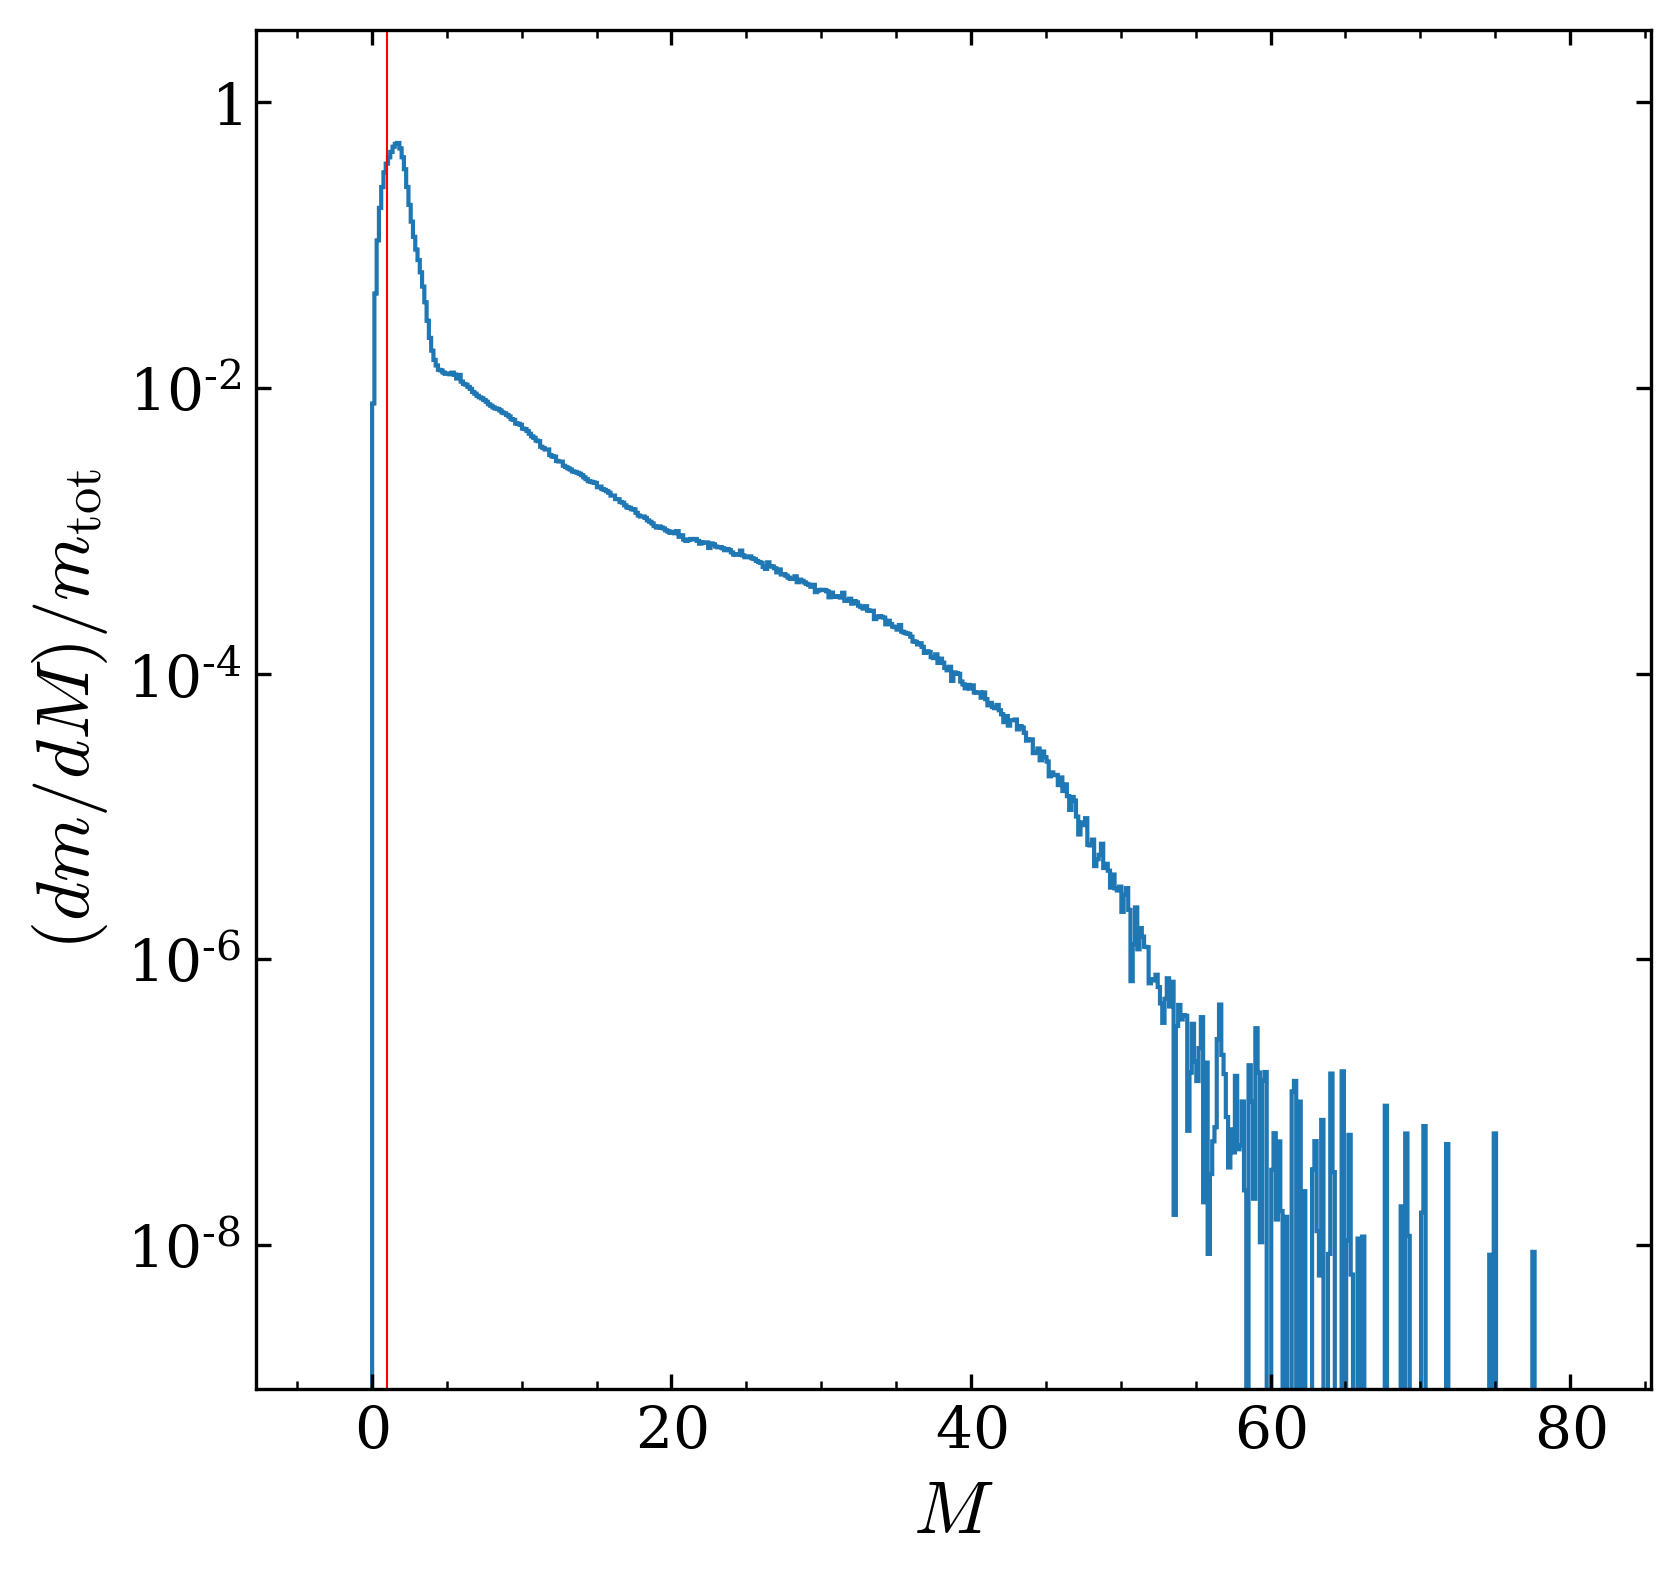

In [19]:
# Mach number PDF
plt.hist(machnumber, bins=512, density=True, histtype='step', weights=m, log=True)
plt.axvline(x=1, linewidth=0.5, color='red')
plt.xlabel('$M$')
plt.ylabel('$(dm/dM)/m_\mathrm{tot}$')
# plt.title('Mach Number PDF')
plt.show()

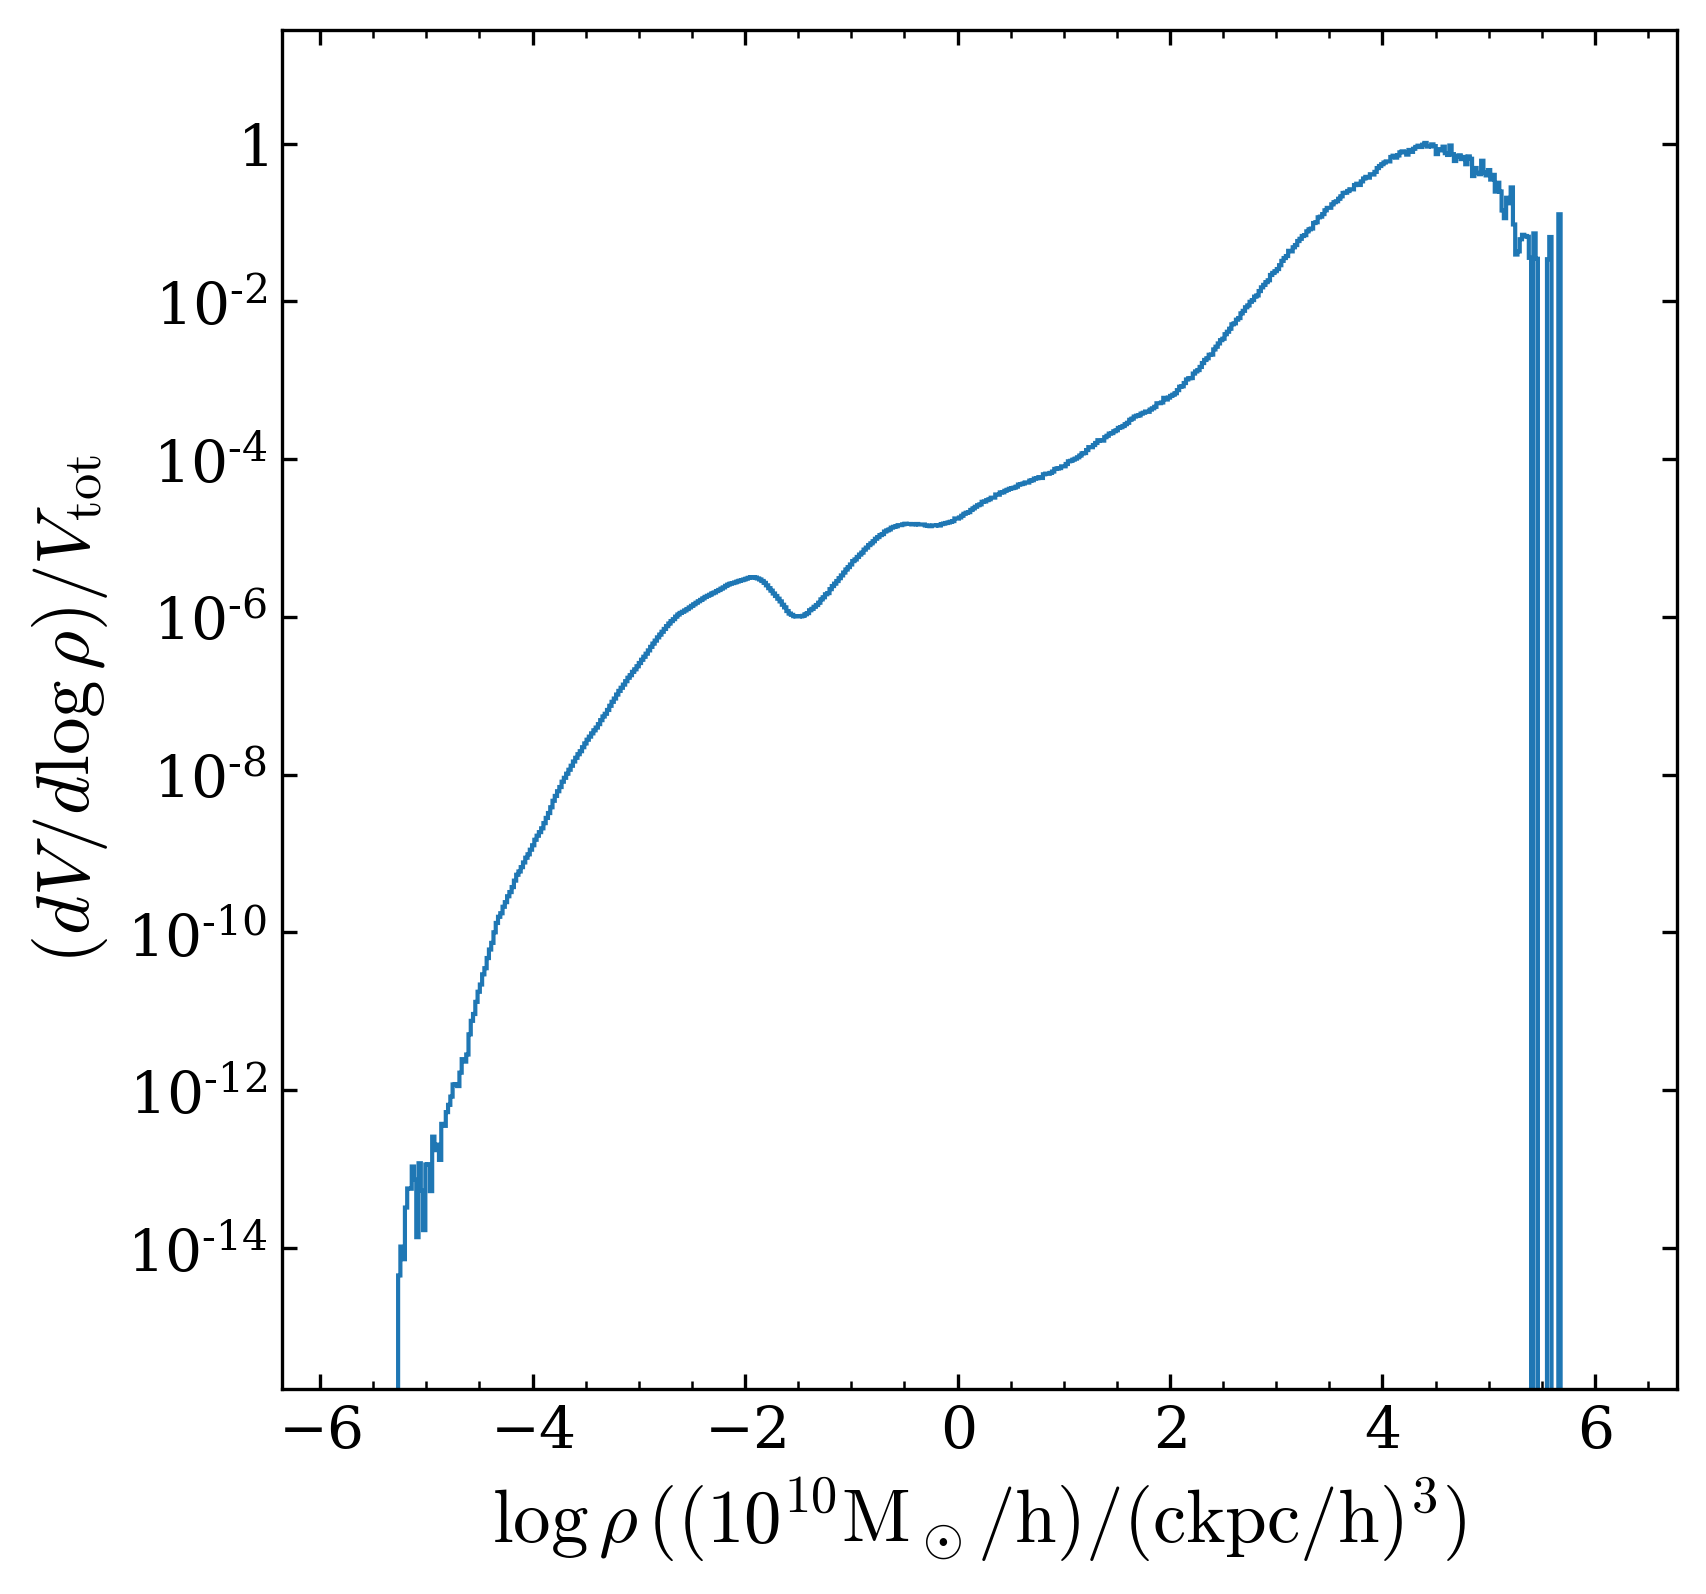

In [111]:
# Density PDF
rho = f['PartType0/Density'][()]
m = f['PartType0/Masses'][()]
V = rho/m
plt.hist(np.log10(rho), bins=512, density=True, histtype='step', weights=V, log=True)
plt.xlabel('$\log{\\rho}\,\mathrm{((10^{10}M_\odot/h)/(ckpc/h)^3)}$')
plt.ylabel('$(dV/d\log{\\rho})/V_\mathrm{tot}$')
# plt.title('Density PDF')
plt.show()

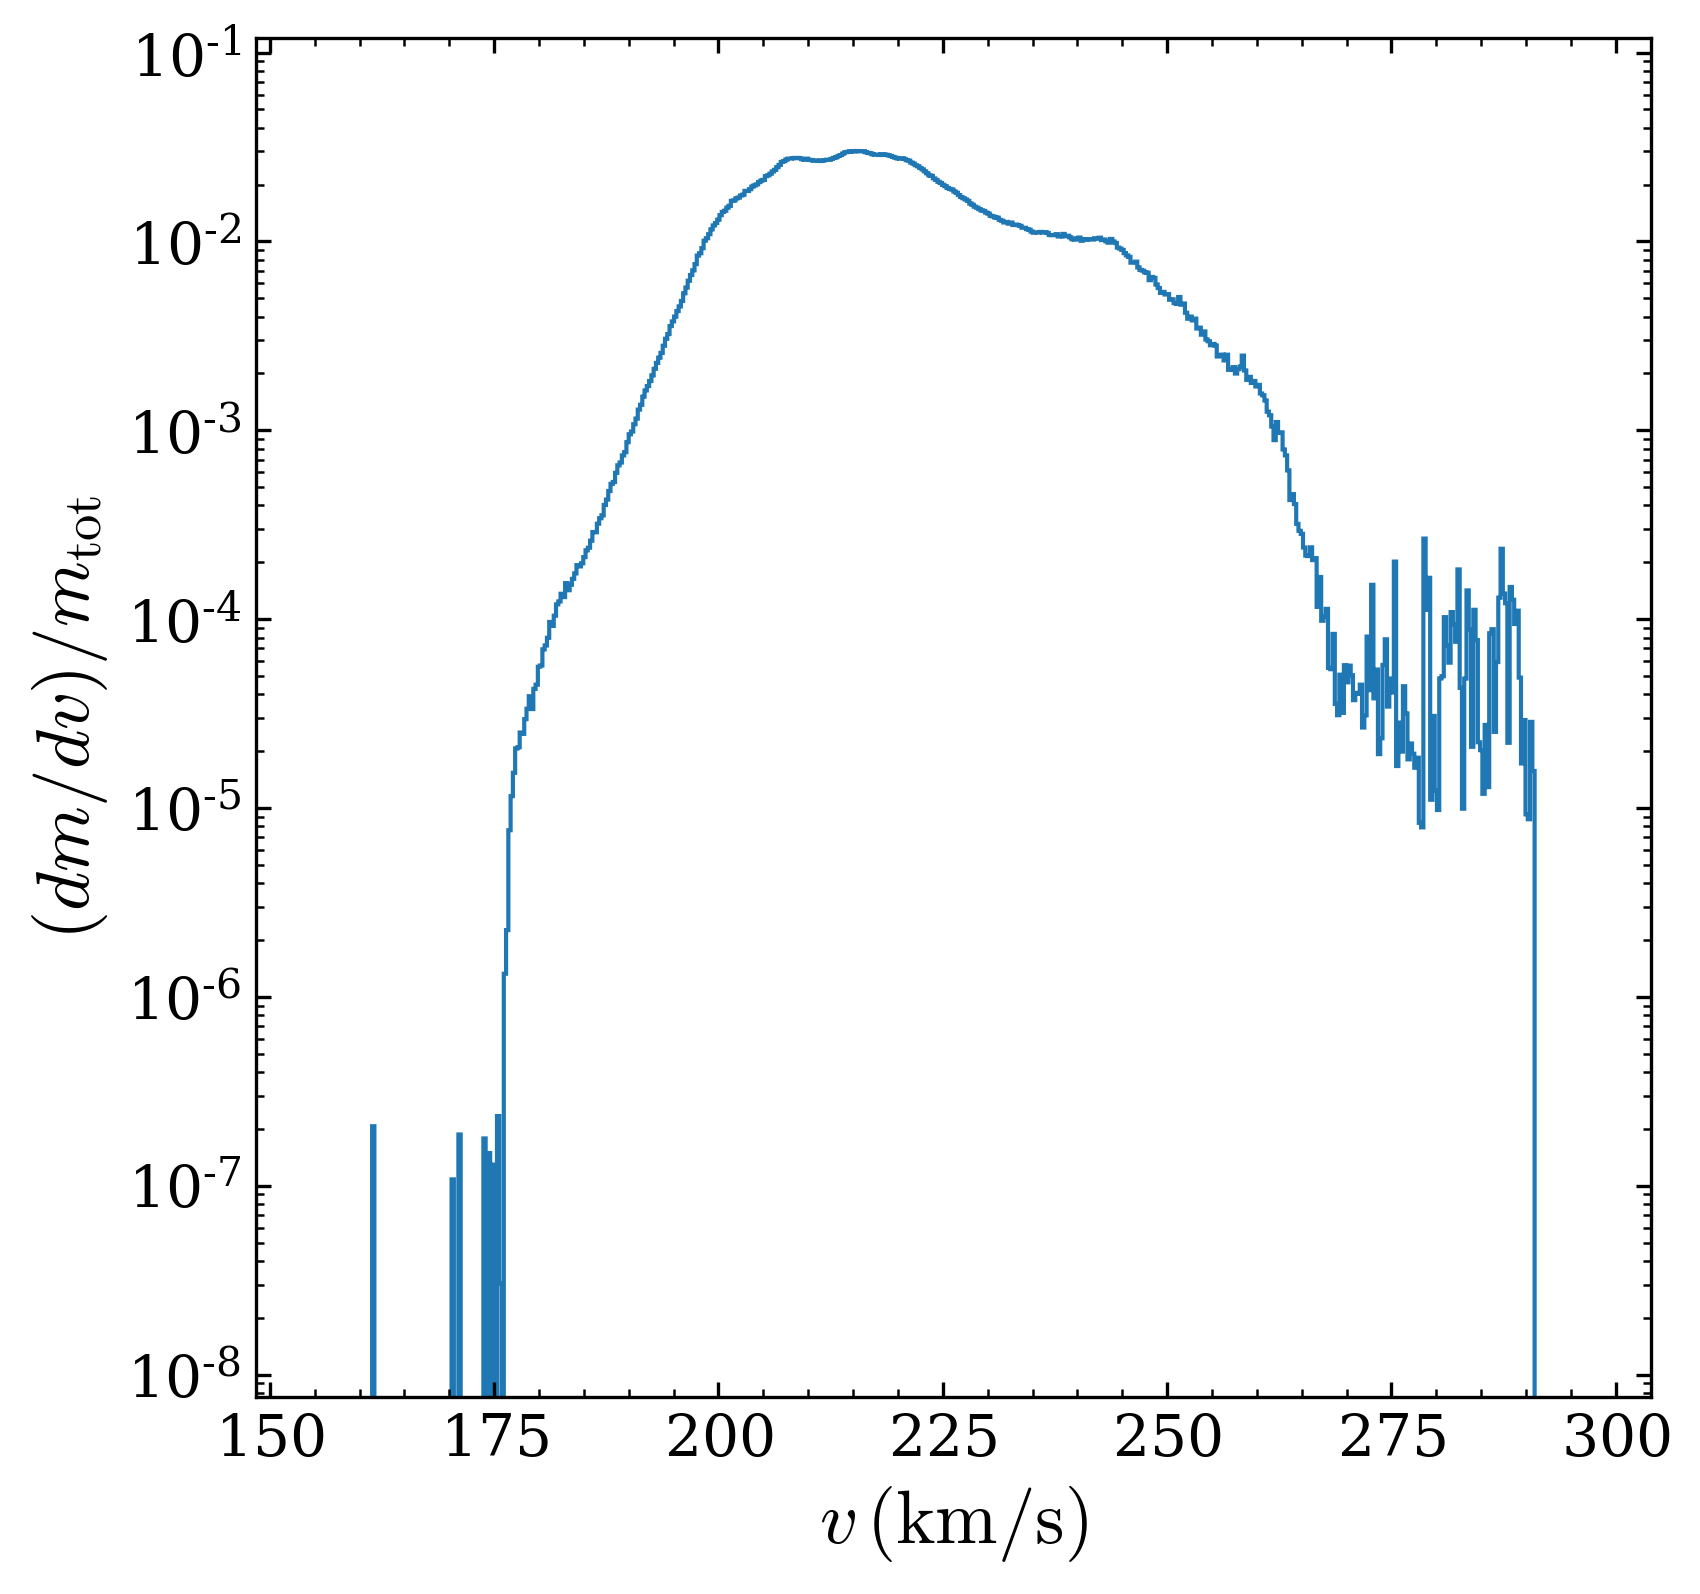

In [110]:
# Speed PDF
v = f['PartType0/Velocities'][()]
m = f['PartType0/Masses'][()]
speed = np.sqrt(v[:,0]**2 + v[:,1]**2 + v[:,2]**2)
plt.hist(speed, bins=512, density=True, histtype='step', weights=m, log=True)
plt.xlabel('$v\, \mathrm{(km/s)}$')
plt.ylabel('$(dm/dv)/m_\mathrm{tot}$')
# plt.title('Speed PDF')
plt.show()

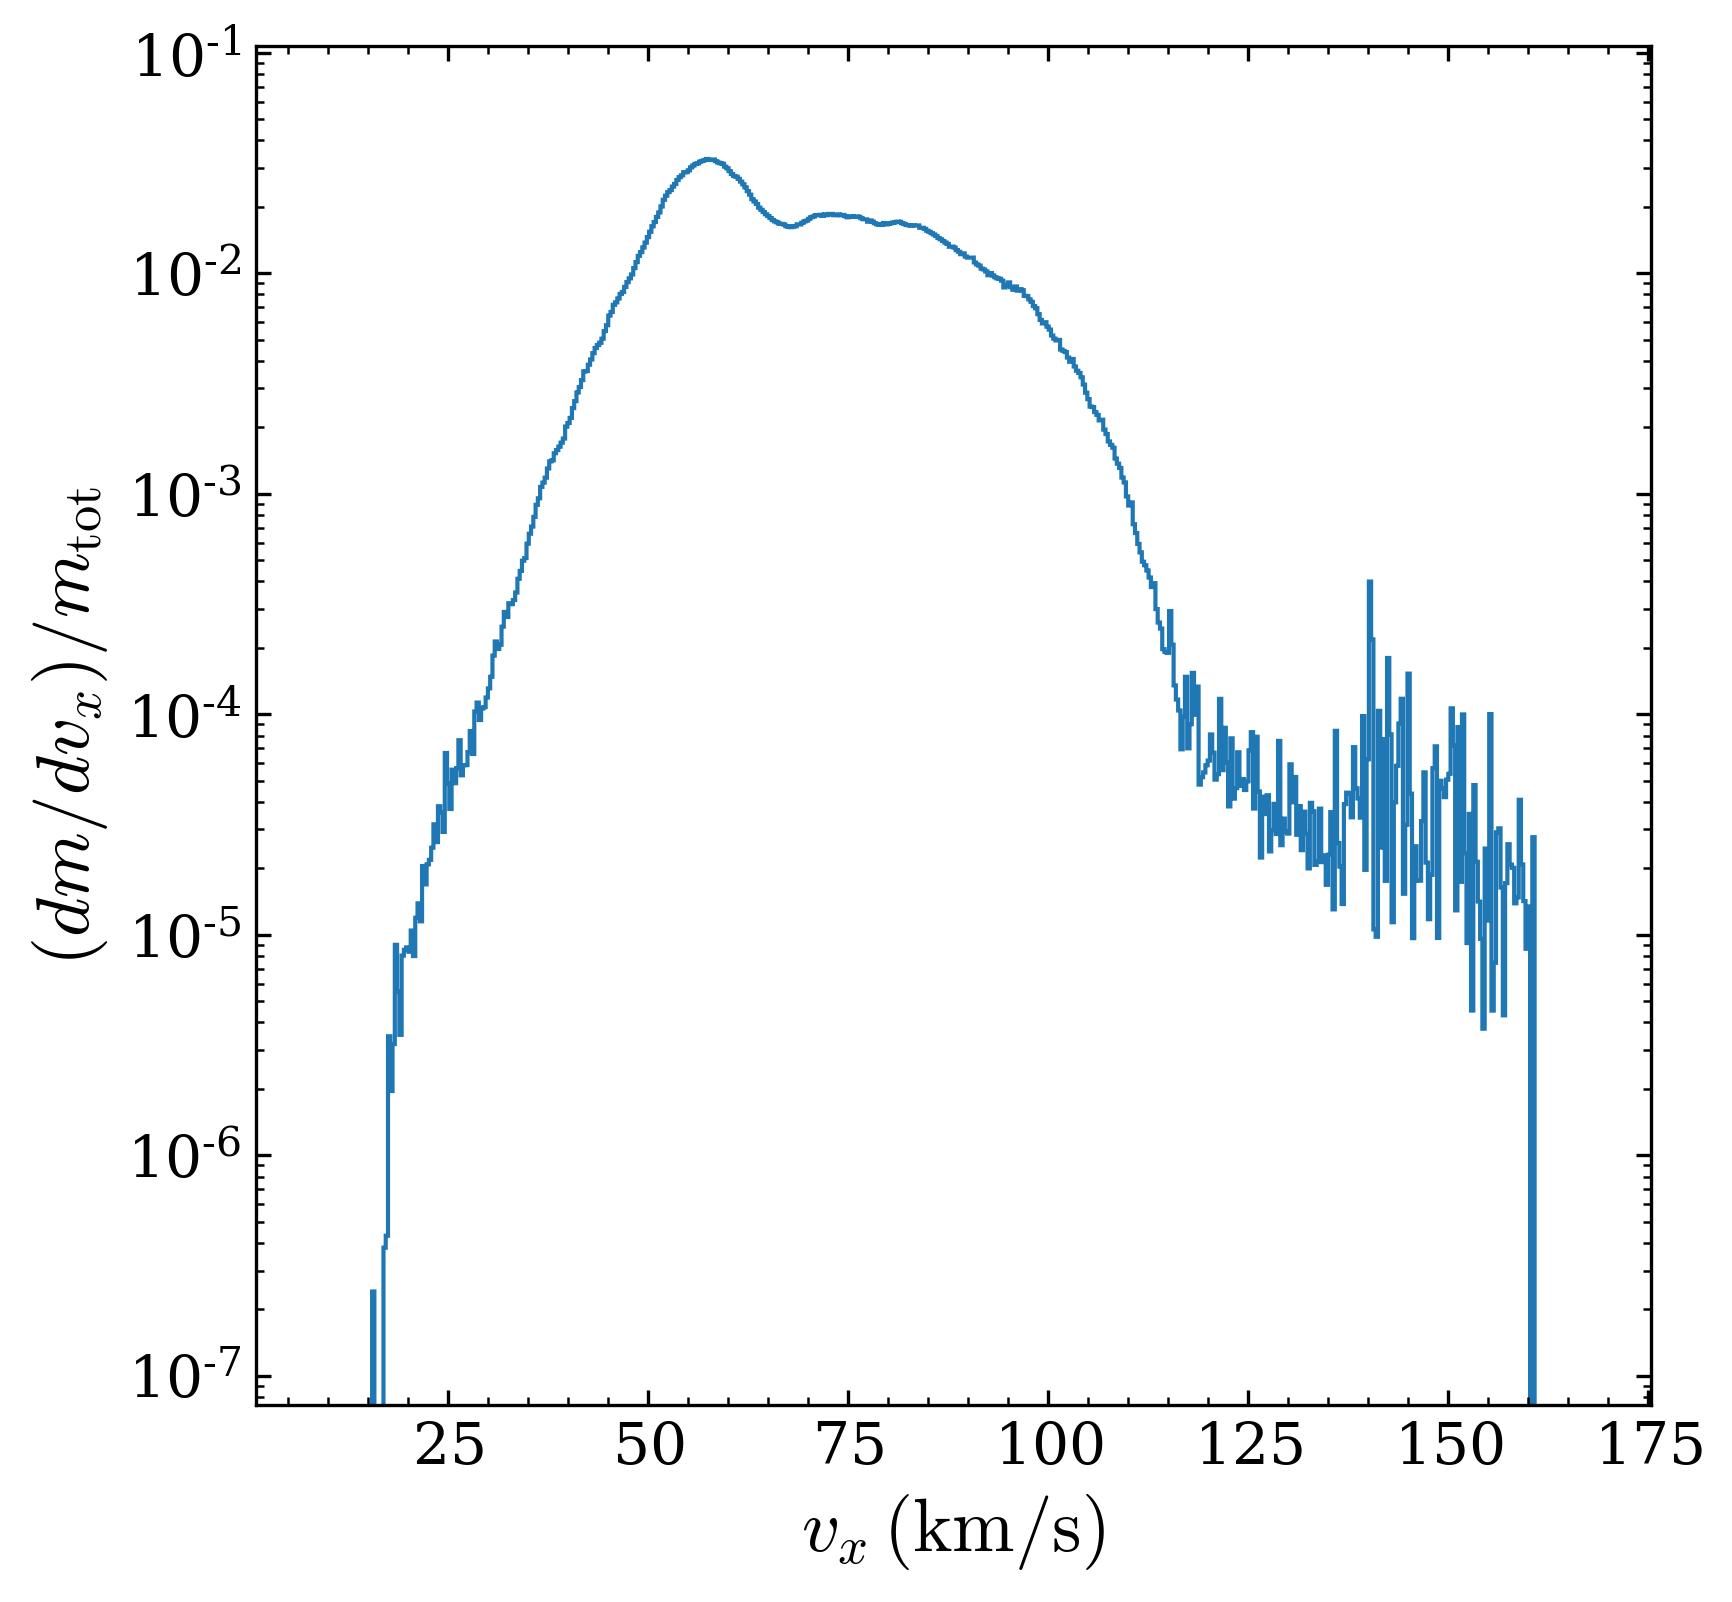

In [109]:
# Velocity Component PDF
v = f['PartType0/Velocities'][()]
m = f['PartType0/Masses'][()]
plt.hist(v[:,0], bins=512, density=True, histtype='step', weights=m, log=True)
plt.xlabel('$v_x\, \mathrm{(km/s)}$')
plt.ylabel('$(dm/dv_x)/m_\mathrm{tot}$')
# plt.title('Velocity PDF')
plt.show()

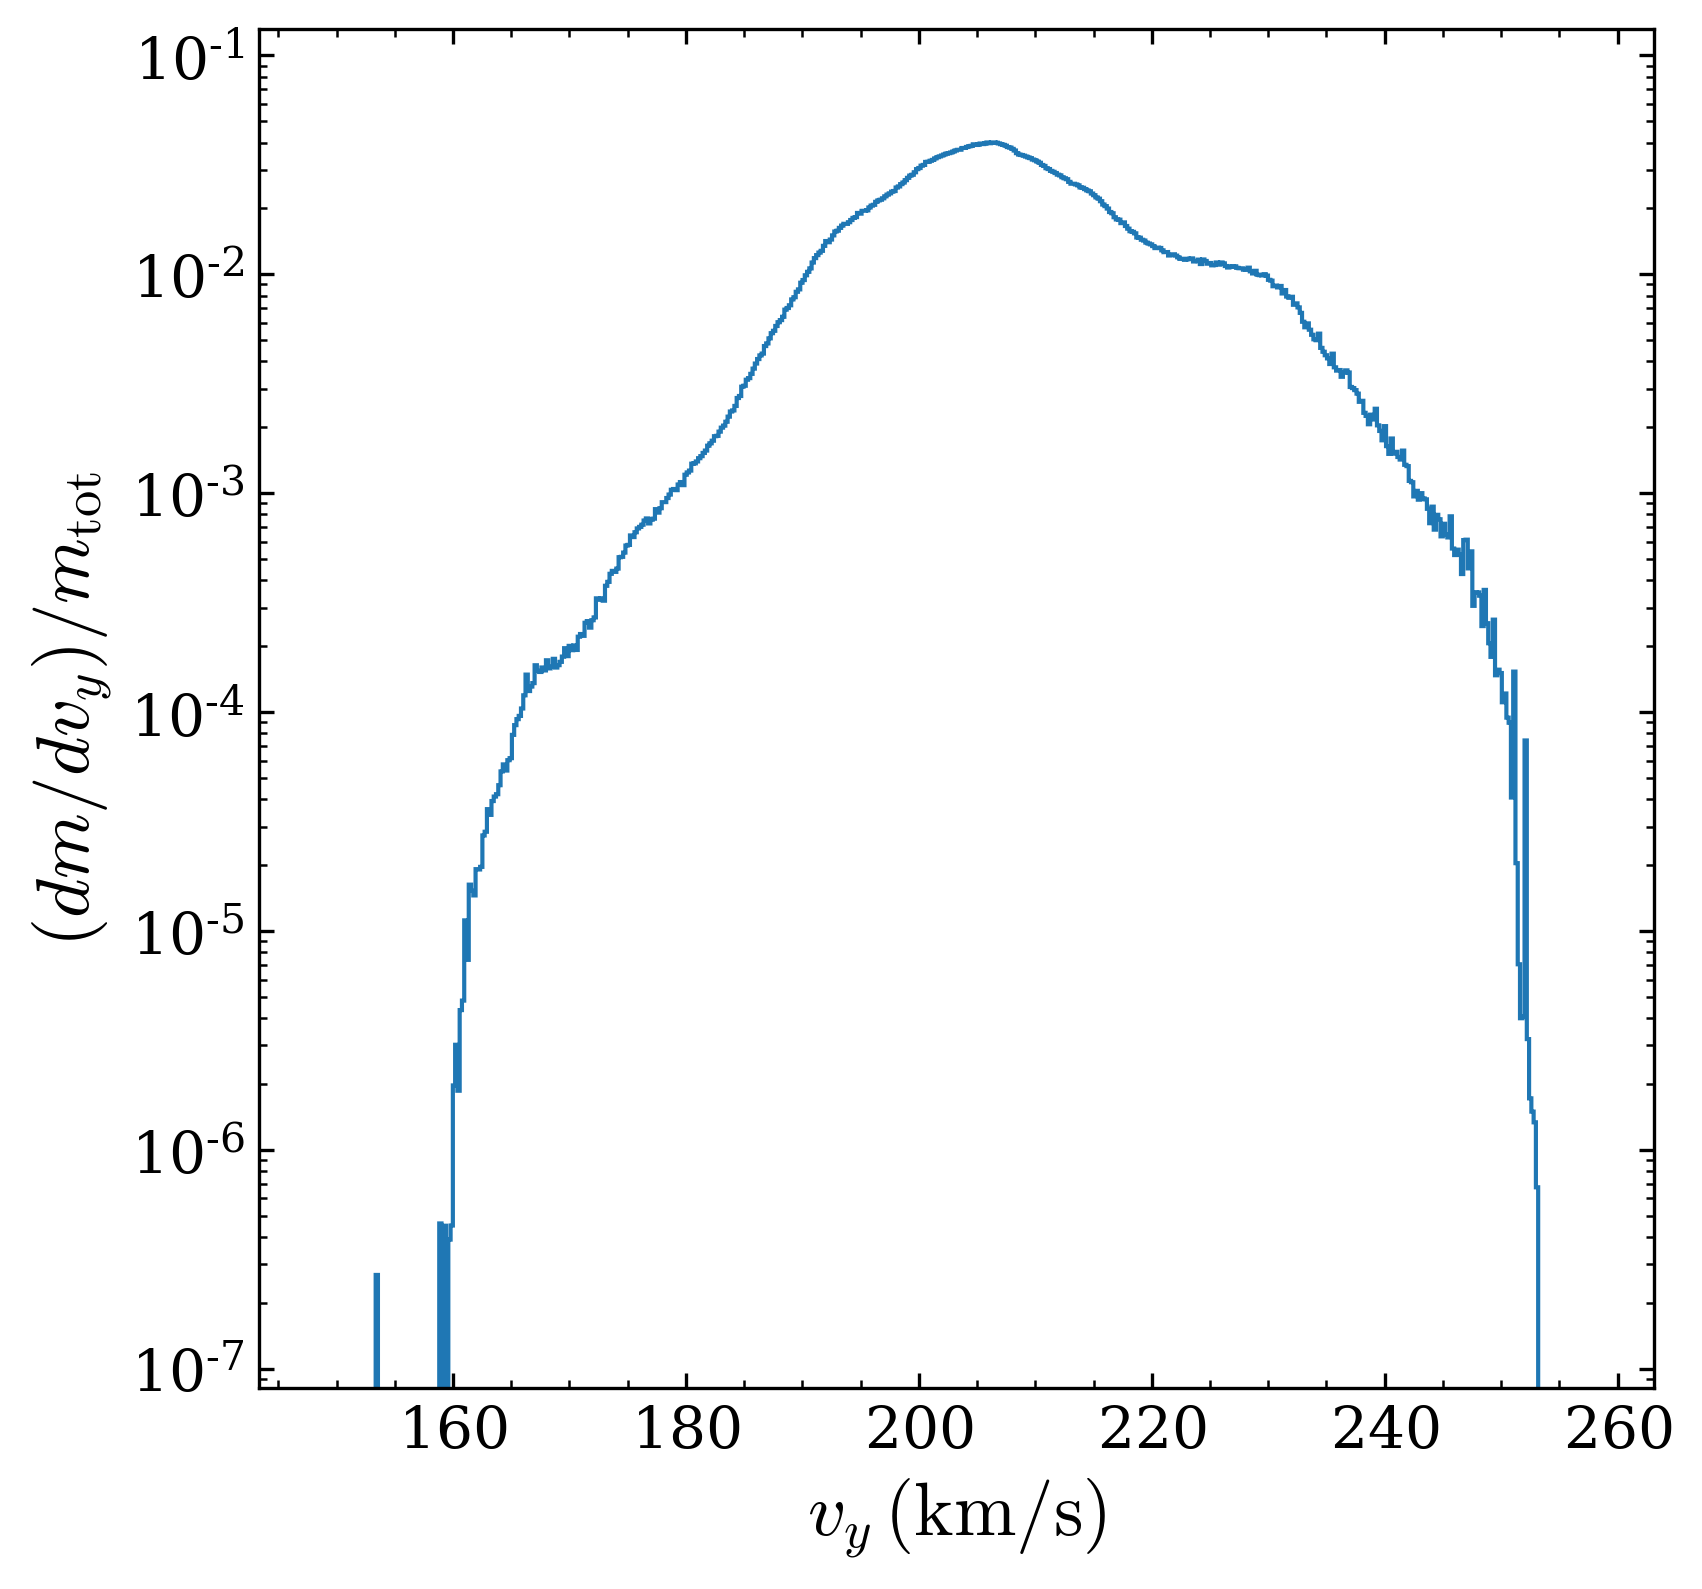

In [108]:
# Velocity Component PDF
v = f['PartType0/Velocities'][()]
m = f['PartType0/Masses'][()]
plt.hist(v[:,1], bins=512, density=True, histtype='step', weights=m, log=True)
plt.xlabel('$v_y\, \mathrm{(km/s)}$')
plt.ylabel('$(dm/dv_y)/m_\mathrm{tot}$')
# plt.title('Velocity PDF')
plt.show()

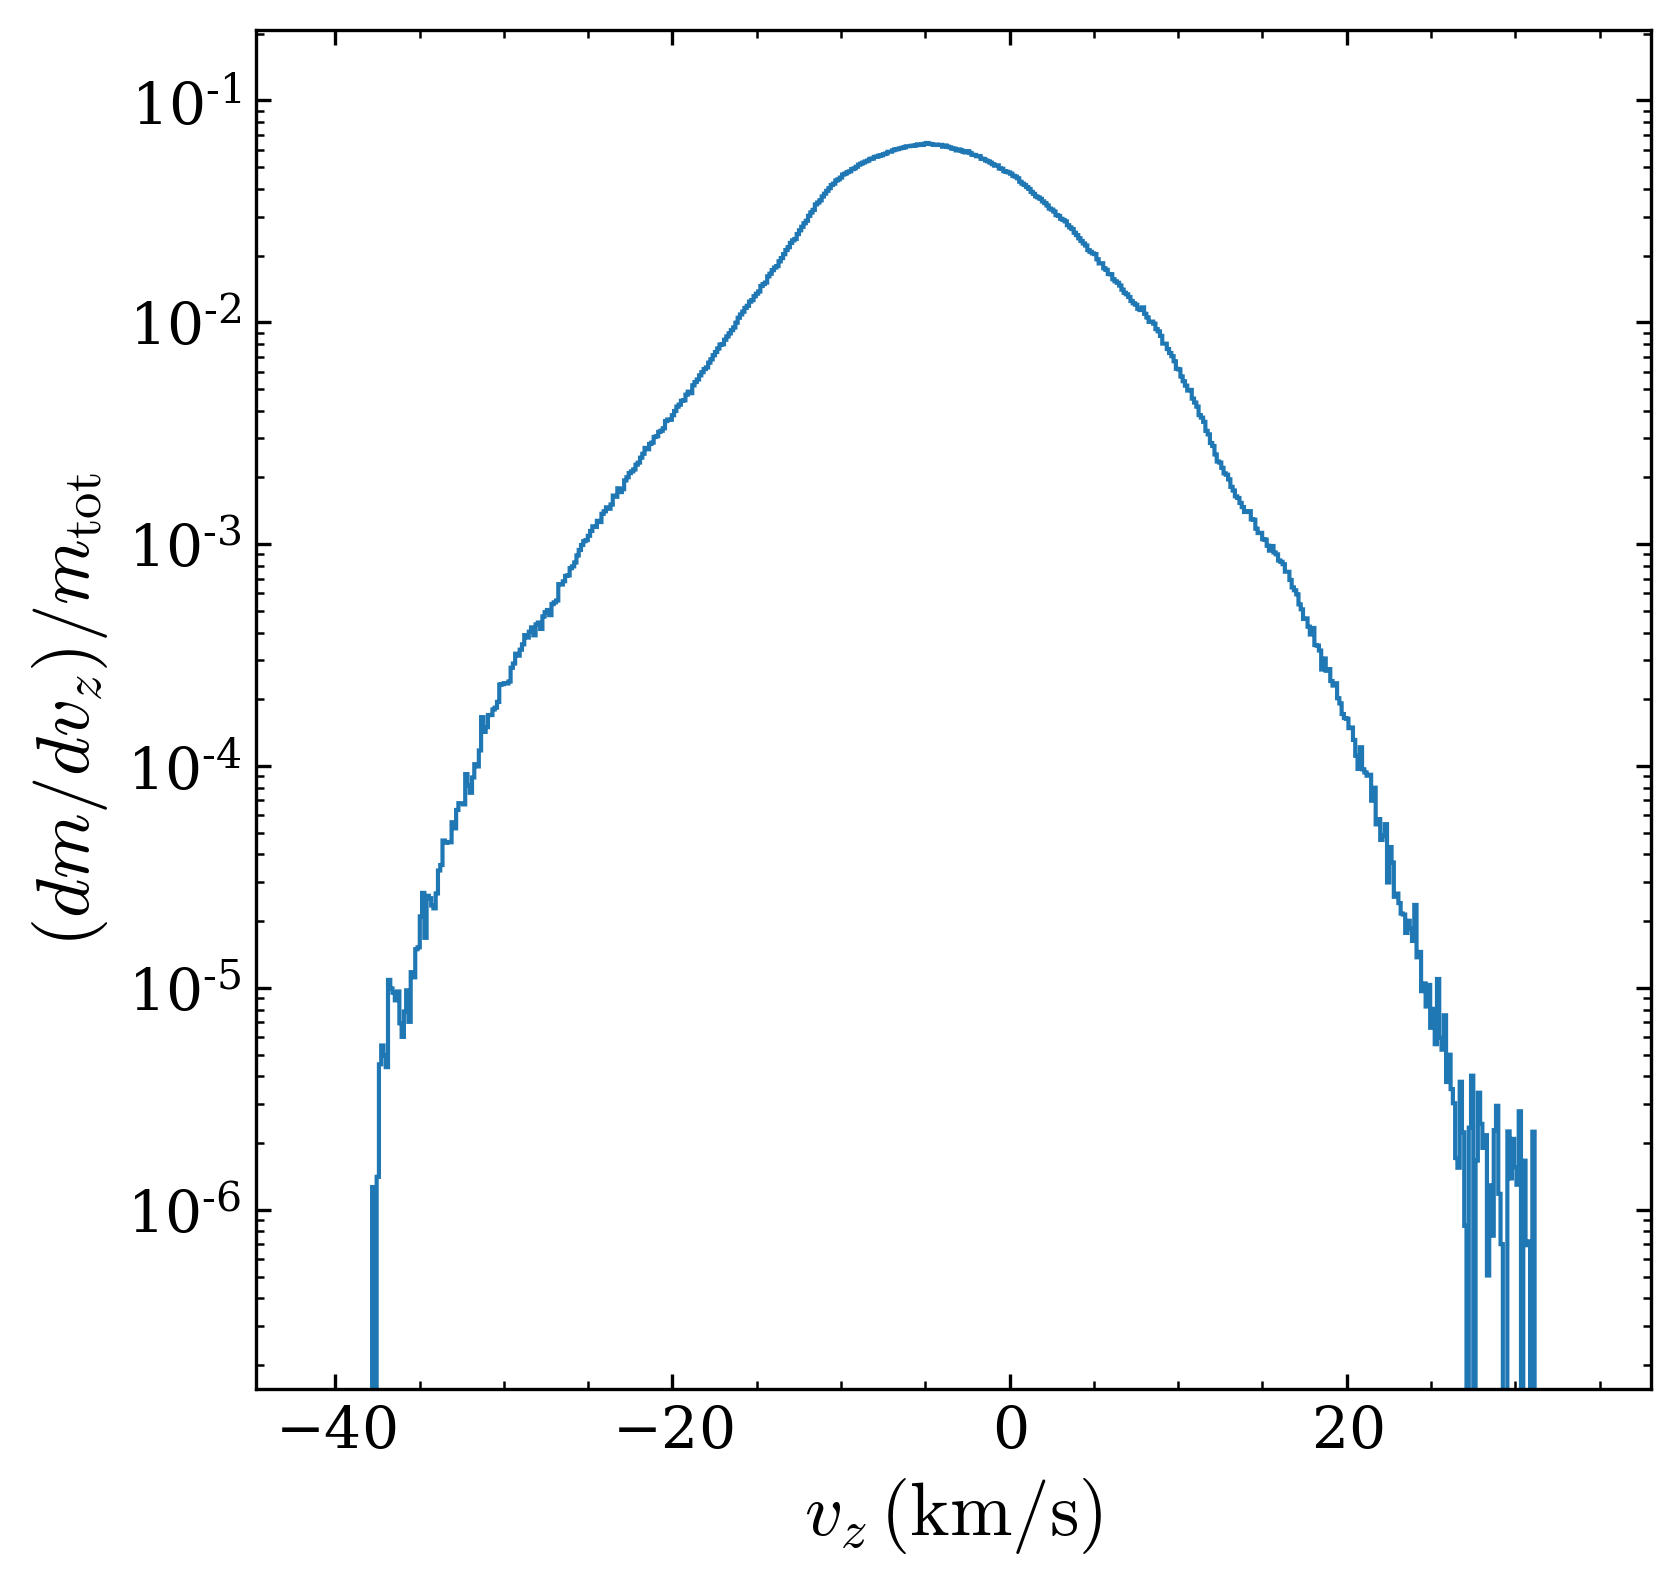

In [107]:
# Velocity Component PDF
v = f['PartType0/Velocities'][()]
m = f['PartType0/Masses'][()]
plt.hist(v[:,2], bins=512, density=True, histtype='step', weights=m, log=True)
plt.xlabel('$v_z\, \mathrm{(km/s)}$')
plt.ylabel('$(dm/dv_z)/m_\mathrm{tot}$')
# plt.title('Velocity PDF')
plt.show()

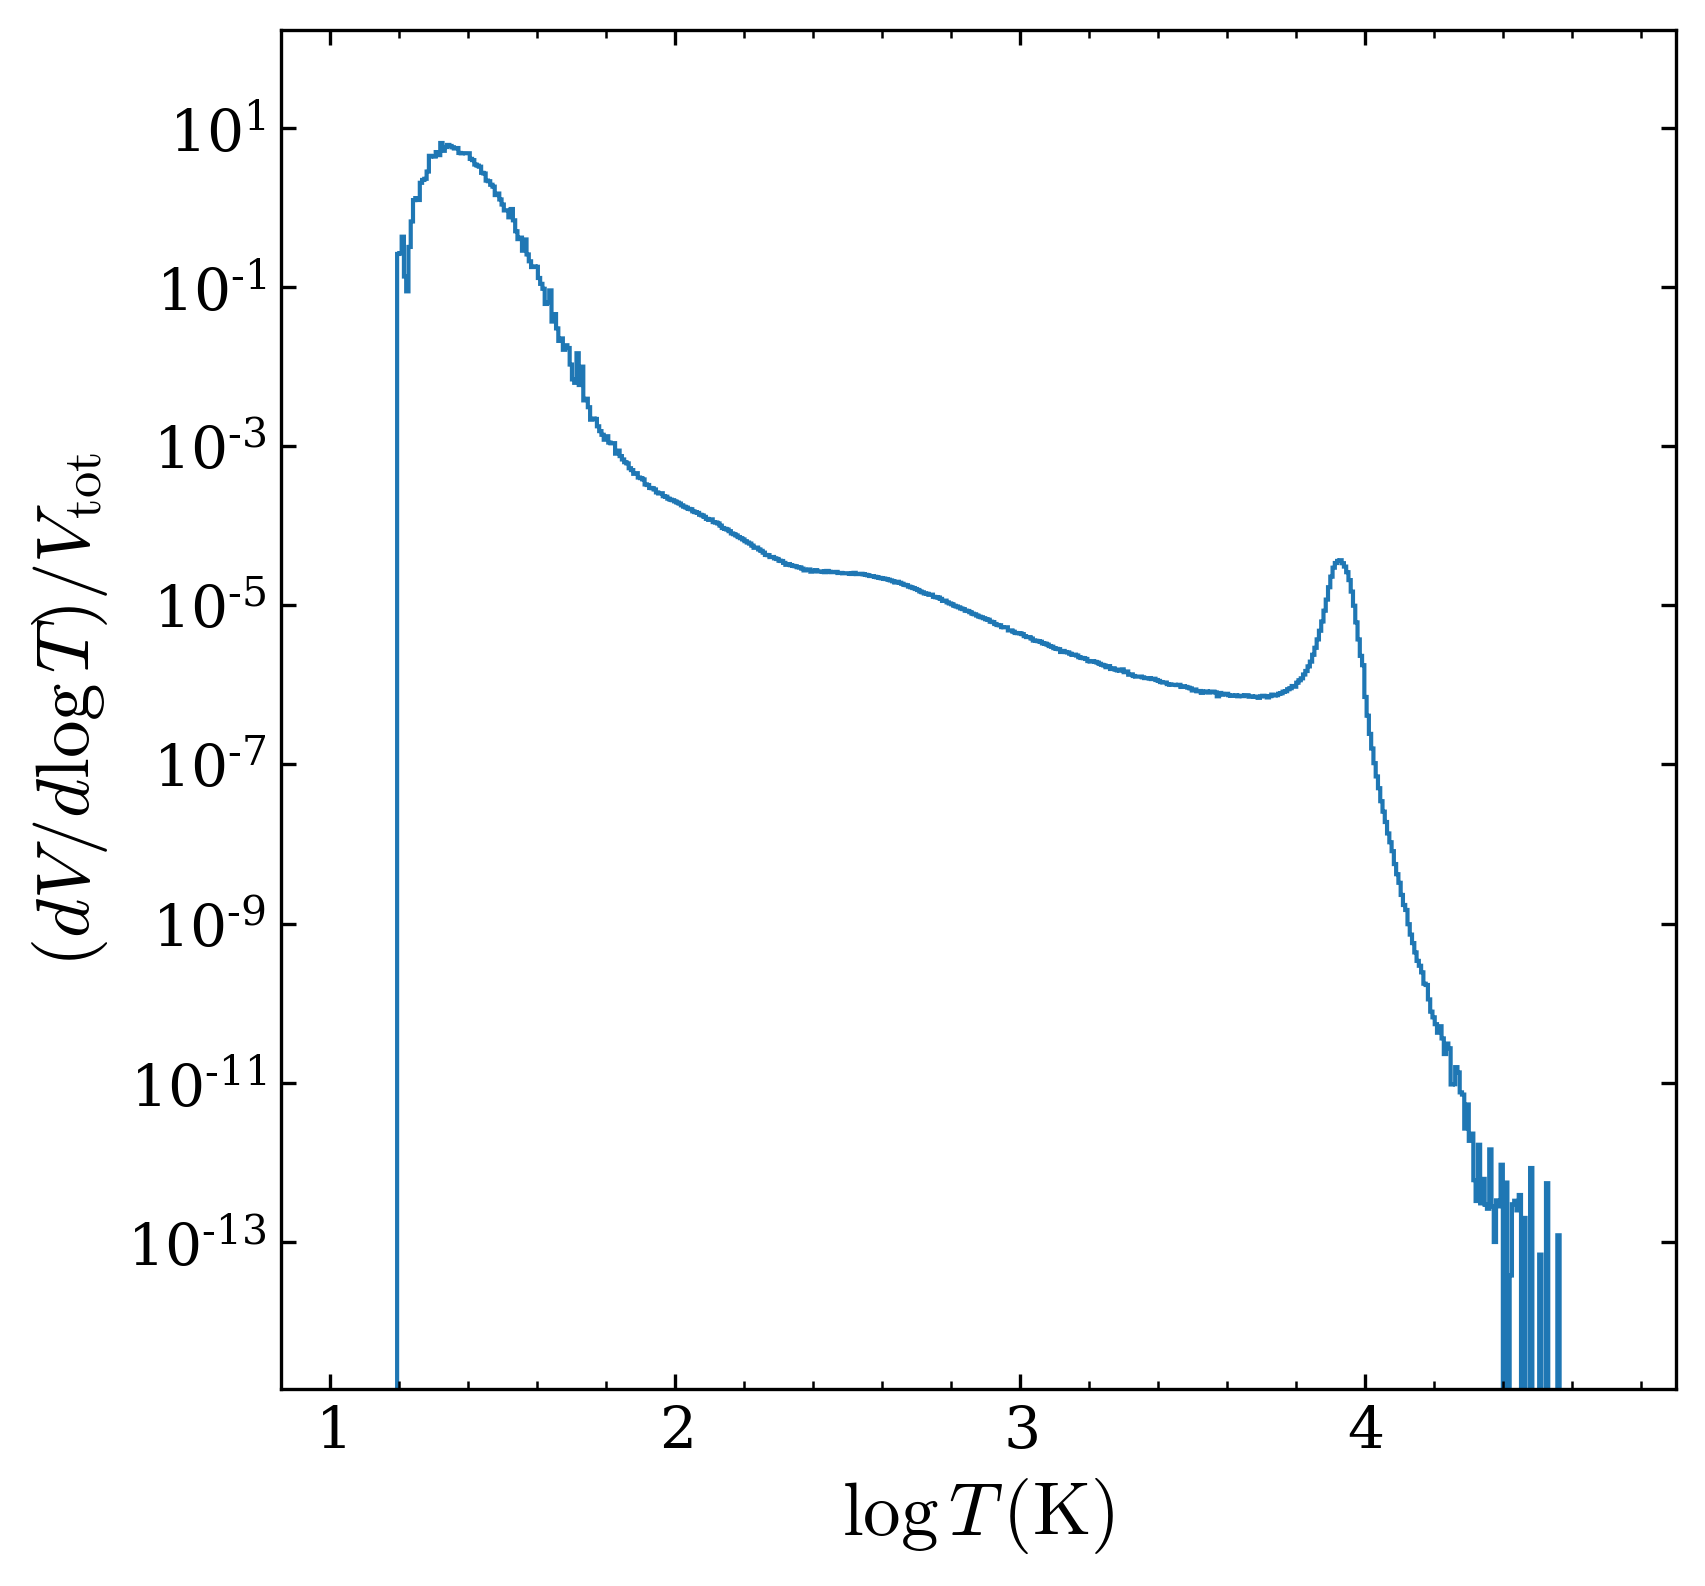

In [103]:
# Temperature PDF # Volume weighted
rho = f['PartType0/Density'][()]
m = f['PartType0/Masses'][()]
u = f['PartType0/InternalEnergy'][()]
xe = f['PartType0/ElectronAbundance'][()]
XH = 0.76
mp = 1.67e-24
gamma = 5/3
kb = 1.38e-16
mu = 4/(1 + 3*XH + 4*XH*xe) * mp
T = (gamma - 1)*u/kb * 10**10 * mu
V = rho/m
plt.hist(np.log10(T), bins=512, density=True, histtype='step', weights=V, log=True)
plt.xlabel('$\log{T} \, \mathrm{(K)}$')
plt.ylabel('$(dV/d\log{T})/V_\mathrm{tot}$')
# plt.title('Temperature PDF')
plt.show()

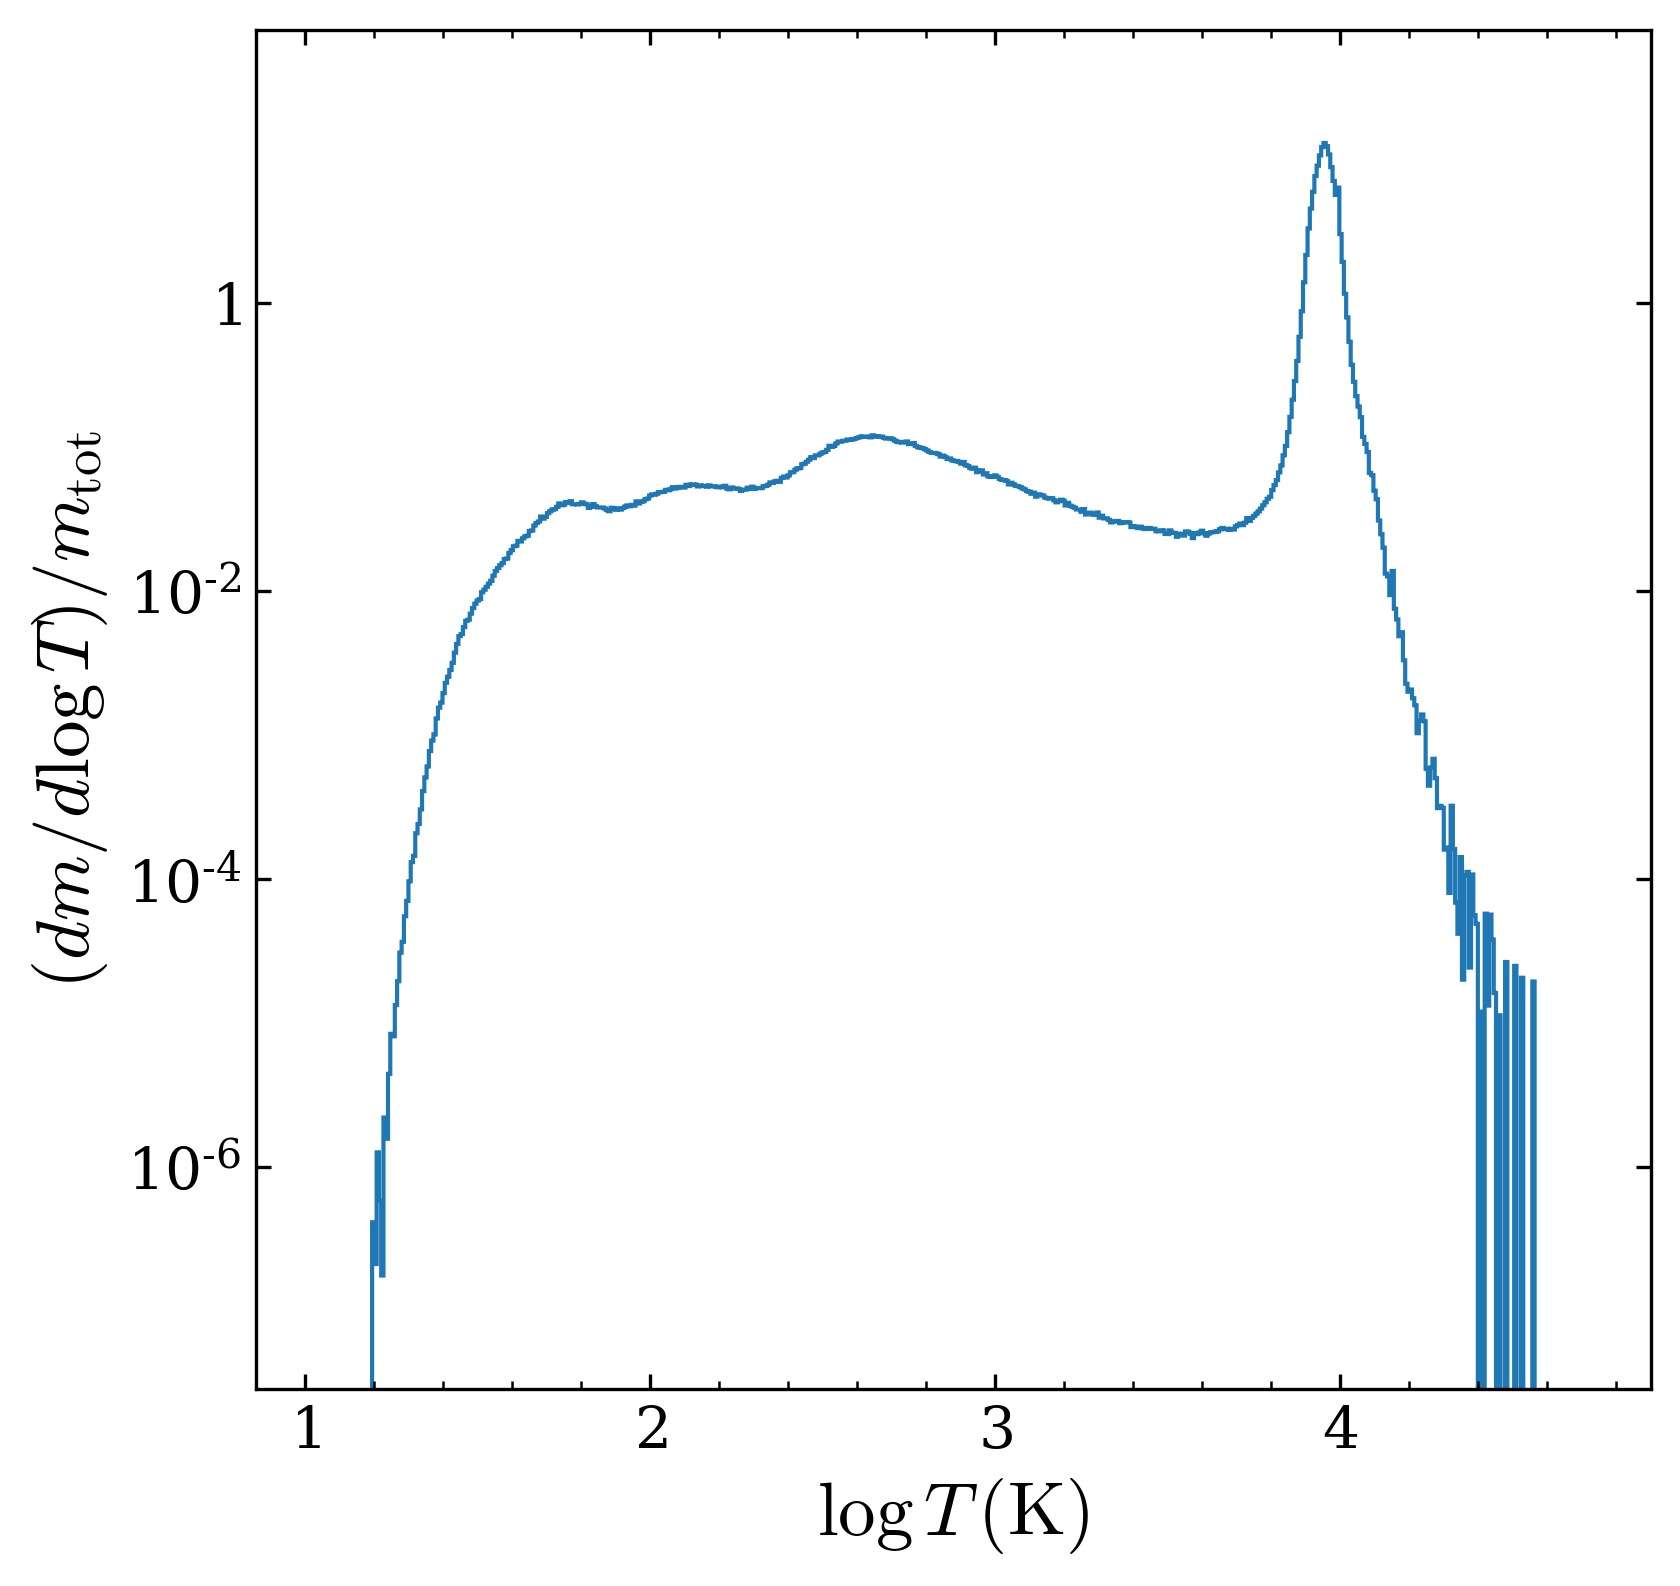

In [104]:
# Temperature PDF # Mass weighted
plt.hist(np.log10(T), bins=512, density=True, histtype='step', weights=m, log=True)
plt.xlabel('$\log{T} \, \mathrm{(K)}$')
plt.ylabel('$(dm/d\log{T})/m_\mathrm{tot}$')
# plt.title('Temperature PDF')
plt.show()

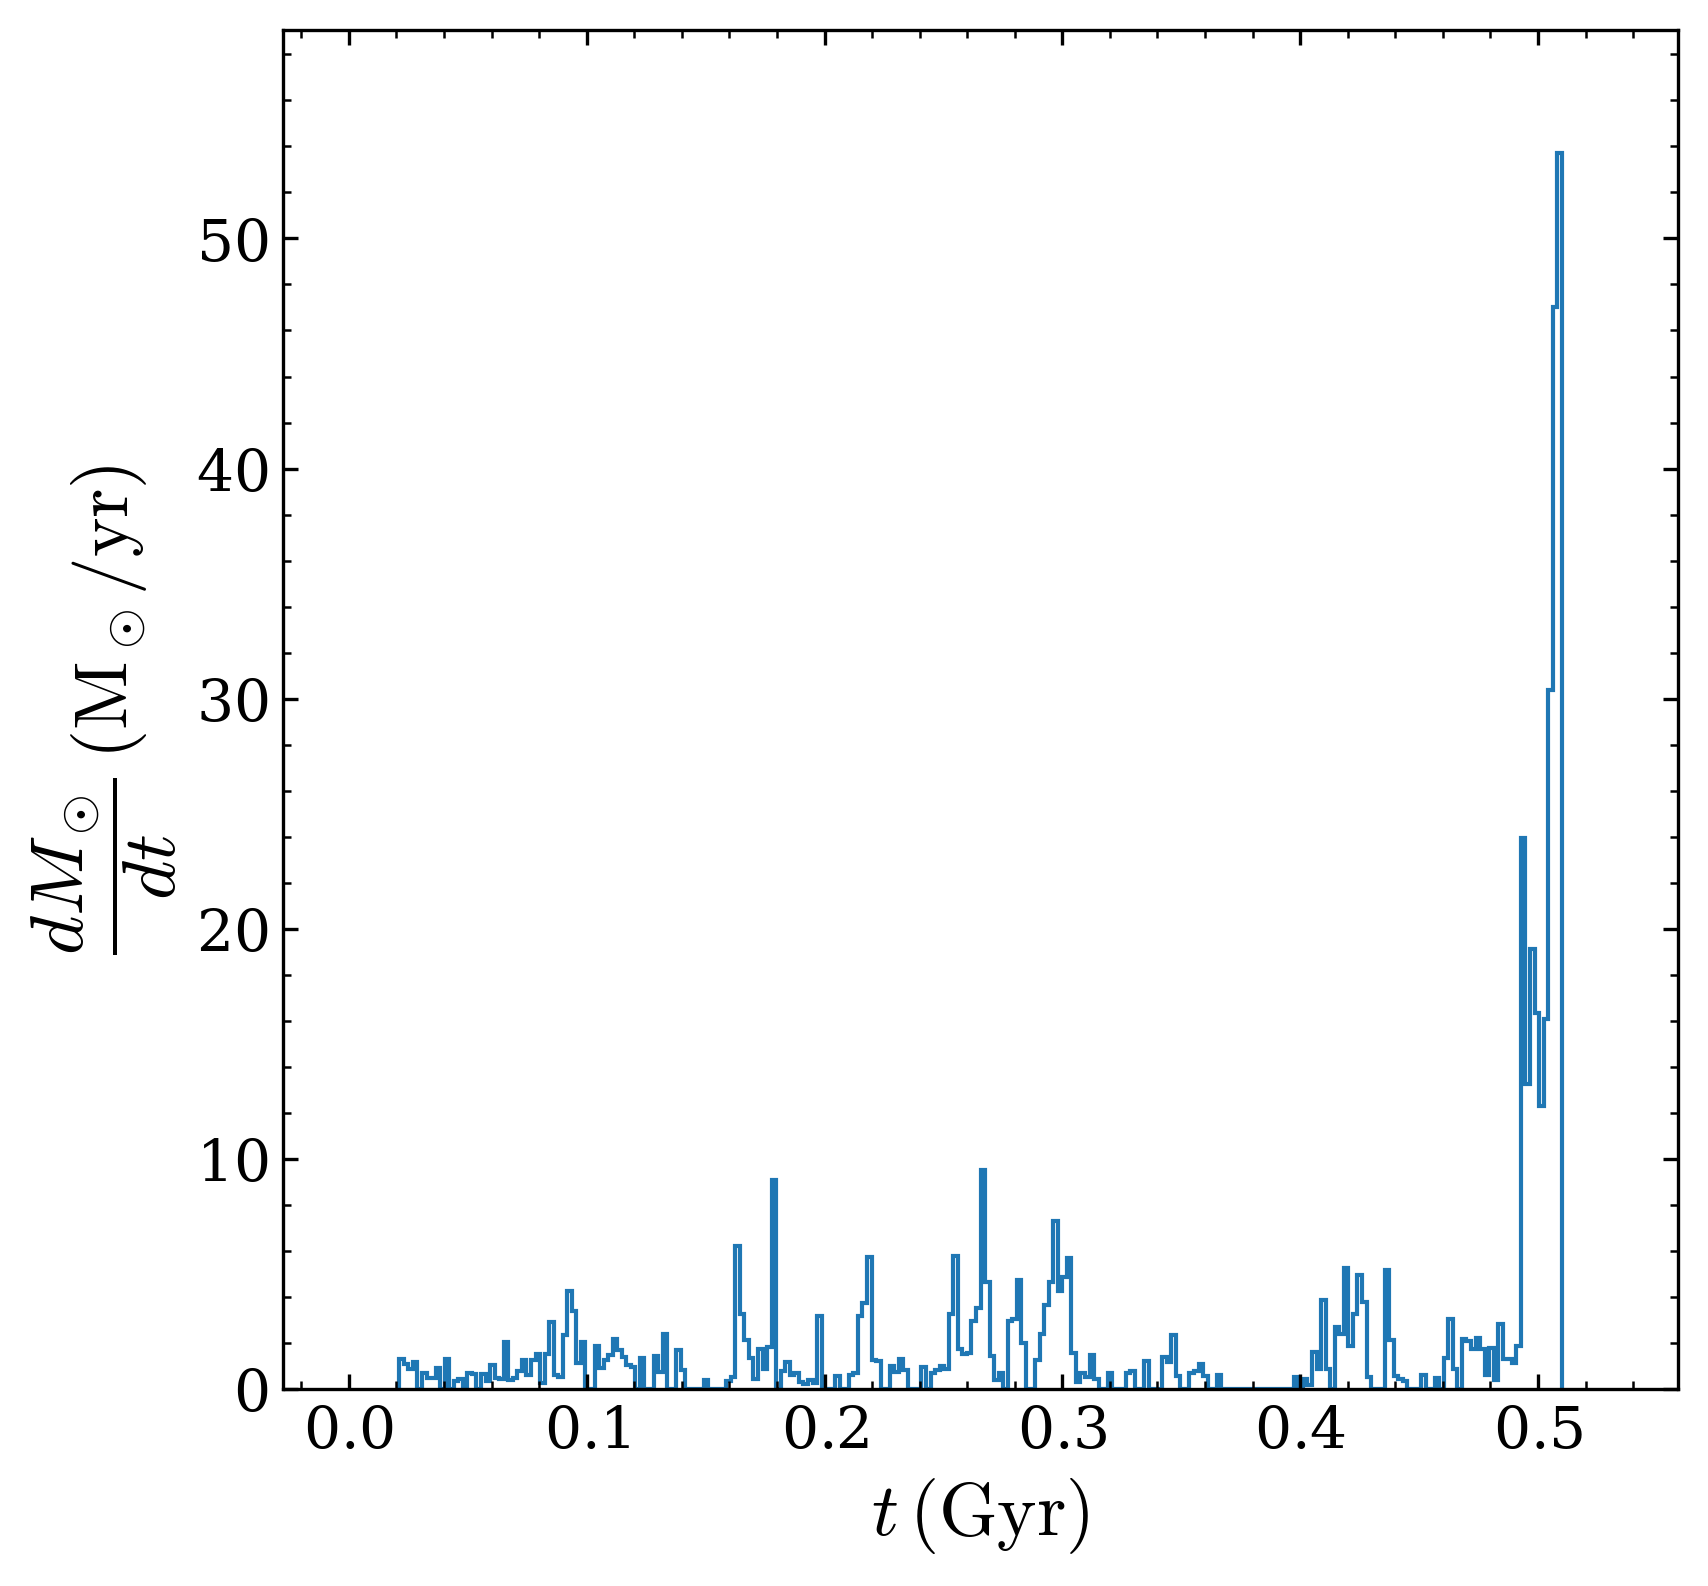

In [106]:
# Star formation history
sft = f['PartType4/GFM_StellarFormationTime'][()]
initial_mass = f['PartType4/GFM_InitialMass'][()] * 10
bin_number = 256
bin_size = (np.max(sft) - np.min(sft)) / bin_number
plt.hist(sft, bins=bin_number, density=True, histtype='step', weights=initial_mass/bin_size)
plt.xlabel('$t \, \mathrm{(Gyr)}$')
plt.ylabel('$\dfrac{dM_\odot}{dt} \, \mathrm{(M_\odot/yr)}$')
# plt.title('Star Formation History')
plt.show()